# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

# These commands below set some options for pandas and to have matplotlib show the charts in the notebook
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:,.2f}'.format

# Load the data
# https://www.kaggle.com/datasets/lobosi/c02-emission-by-countrys-grouth-and-population?resource=download
energy = pd.read_csv('energy.csv', index_col=False)

# https://data.worldbank.org/indicator/EN.ATM.CO2E.PC?end=2019&start=1990
# Removed all lines before the header
API_df = pd.read_csv('API_EN.ATM.CO2E.PC_DS2_en_csv_v2_4251354.csv', index_col=False)
Metadata_country_df = pd.read_csv('Metadata_Country_API_EN.ATM.CO2E.PC_DS2_en_csv_v2_4251354.csv', index_col=False)

#Load the data for death rate from air pollution per 100K
#data source https://ourworldindata.org/grapher/death-rate-from-air-pollution-per-100000
death_rate = pd.read_csv('death-rate-from-air-pollution-per-100000.csv', index_col=False)

In [2]:
# Plotly import
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import chart_studio.plotly as py
import seaborn as sns
import plotly.express as px
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

# EDA

In [3]:
#What is the shape of all of our dataframes?
print(energy.shape)
print(API_df.shape)
print(Metadata_country_df.shape)

(55440, 11)
(266, 66)
(265, 6)


In [4]:
#Remove all columns with no data
death_rate.dropna(axis=1, how='all', inplace=True)
#Rename column name
death_rate.rename(columns={'Deaths - Cause: All causes - Risk: Air pollution - Sex: Both - Age: Age-standardized (Rate)': 'Deaths_Rate_100K'}, inplace=True)
death_rate.rename(columns={'Entity':'Country', 'Code':'Country_code'}, inplace=True)
#What does our death_rate dataframe look like now?
death_rate.head()

Country Country_code  Year  Deaths_Rate_100K
0  Afghanistan          AFG  1990            402.18
1  Afghanistan          AFG  1991            390.09
2  Afghanistan          AFG  1992            383.20
3  Afghanistan          AFG  1993            387.70
4  Afghanistan          AFG  1994            394.02

In [5]:
#Remove all columns with no data
API_df = API_df.dropna(axis=1, how='all')
Metadata_country_df = Metadata_country_df.dropna(axis=1, how='all')
energy.drop(columns=energy.columns[0], axis=1, inplace=True)
#melt the API df so it matches the other datasets
API_df = pd.melt(API_df, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])
API_df.columns = ['Country', 'Country_code', 'Indicator_name', 'Indicator_code', 'Year', 'CO2_capita']
#what does our API_DF datafoundation look like now?
API_df.head()

Country Country_code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                           Indicator_name  Indicator_code  Year  CO2_capita  
0  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  1990         NaN  
1  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  1990        1.00  
2  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  1990        0.19  
3  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  1990        0.48  
4  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  1990        0.55

In [6]:
#change numeric values into numeric types
API_df[['Year', 'CO2_capita']] = API_df[['Year', 'CO2_capita']].apply(pd.to_numeric)
#rename the column to match the other dataset
Metadata_country_df.rename(columns={'TableName':'Country'}, inplace=True)
Metadata_country_df.rename(columns={'Country Code':'Country_code'}, inplace=True)
#Add Energy_type and set all of them to "all_energy_types" so that I can merge with main dataframe
Metadata_country_df['Energy_type']='all_energy_types'
#What does our Metadata_country_df datafoundation look like now?
Metadata_country_df.head()

Country_code                     Region          IncomeGroup  \
0          ABW  Latin America & Caribbean          High income   
1          AFE                        NaN                  NaN   
2          AFG                 South Asia           Low income   
3          AFW                        NaN                  NaN   
4          AGO         Sub-Saharan Africa  Lower middle income   

                                        SpecialNotes  \
0                                                NaN   
1  26 countries, stretching from the Red Sea in t...   
2  The reporting period for national accounts dat...   
3  22 countries, stretching from the westernmost ...   
4  The World Bank systematically assesses the app...   

                       Country       Energy_type  
0                        Aruba  all_energy_types  
1  Africa Eastern and Southern  all_energy_types  
2                  Afghanistan  all_energy_types  
3   Africa Western and Central  all_energy_types  
4                       Angola  all_energy_types

In [7]:
#add the income group, region, energy type, and country code to a new dataset that includes all supplemental data
#no need to add SpecialNotes because we won't be using that information for our analysis.
supp_df = pd.merge(API_df,Metadata_country_df[['Country','IncomeGroup','Energy_type','Region','Country_code']],on=['Country','Country_code'], how='left')
#What does the combined supplemental dataframe look like now?
supp_df

Country Country_code  \
0                           Aruba          ABW   
1     Africa Eastern and Southern          AFE   
2                     Afghanistan          AFG   
3      Africa Western and Central          AFW   
4                          Angola          AGO   
...                           ...          ...   
7975                       Kosovo          XKX   
7976                  Yemen, Rep.          YEM   
7977                 South Africa          ZAF   
7978                       Zambia          ZMB   
7979                     Zimbabwe          ZWE   

                              Indicator_name  Indicator_code  Year  \
0     CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  1990   
1     CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  1990   
2     CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  1990   
3     CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  1990   
4     CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  1990   
...                                      ...             ...   ...   
7975  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  2019   
7976  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  2019   
7977  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  2019   
7978  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  2019   
7979  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  2019   

      CO2_capita          IncomeGroup       Energy_type  \
0            NaN          High income  all_energy_types   
1           1.00                  NaN  all_energy_types   
2           0.19           Low income  all_energy_types   
3           0.48                  NaN  all_energy_types   
4           0.55  Lower middle income  all_energy_types   
...          ...                  ...               ...   
7975         NaN  Upper middle income  all_energy_types   
7976        0.38           Low income  all_energy_types   
7977        7.51  Upper middle income  all_energy_types   
7978        0.38           Low income  all_energy_types   
7979        0.80  Lower middle income  all_energy_types   

                          Region  
0      Latin America & Caribbean  
1                            NaN  
2                     South Asia  
3                            NaN  
4             Sub-Saharan Africa  
...                          ...  
7975       Europe & Central Asia  
7976  Middle East & North Africa  
7977          Sub-Saharan Africa  
7978          Sub-Saharan Africa  
7979          Sub-Saharan Africa  

[7980 rows x 9 columns]

In [8]:
#Supplemental DataSet
#Added because main dataset had several missing countries and several country names did not match our supplemental datasets
#will be used for a geographical map later
iso_code =pd.read_csv("countries_codes_and_coordinates.csv")
iso_code = iso_code[['Country','Alpha-3 code']]
def replace_string(x):
    lst=[]
    for i in x:
        if i != '"' and i !=" ":
            # print(i)
            lst.append(i)
    return (str("".join(lst)))
iso_code['Alpha-3 code'] = iso_code['Alpha-3 code'].apply(replace_string)
iso_code.head()

Country Alpha-3 code
0     Afghanistan          AFG
1         Albania          ALB
2         Algeria          DZA
3  American Samoa          ASM
4         Andorra          AND

In [9]:
#now combine the supplemental and main energy dataframes
final_df = pd.merge(energy,supp_df[['Country','Year','Energy_type','CO2_capita']],on=['Country','Year','Energy_type'],how='left')
final_df = pd.merge(final_df,supp_df[['Country', 'IncomeGroup','Region','Country_code']],on=['Country'],how='left')
#creates alot of duplicate rows so just drop all duplicates
final_df = final_df.drop_duplicates()
#get rid of the CO2_capita value for everything but 'all_energy_types'
final_df.loc[final_df['Energy_type'] != 'all_energy_types','CO2_capita'] = np.nan
#What kind of information do we have in the final datafoundation?
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55440 entries, 0 to 1315170
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      55440 non-null  object 
 1   Energy_type                  55440 non-null  object 
 2   Year                         55440 non-null  int64  
 3   Energy_consumption           44287 non-null  float64
 4   Energy_production            44289 non-null  float64
 5   GDP                          40026 non-null  float64
 6   Population                   46014 non-null  float64
 7   Energy_intensity_per_capita  50358 non-null  float64
 8   Energy_intensity_by_GDP      50358 non-null  float64
 9   CO2_emission                 51614 non-null  float64
 10  CO2_capita                   4930 non-null   float64
 11  IncomeGroup                  42960 non-null  object 
 12  Region                       42960 non-null  object 
 13  Country_code  

In [10]:
#outer merge, gain few countries that are present in the death_rate dataset
final_df_v3 = pd.merge(final_df, death_rate[['Country','Country_code','Year','Deaths_Rate_100K']],on=['Country','Country_code','Year'],how='outer')
final_df_v3.shape

(57270, 15)

Text(0.5, 1.0, 'Global CO2 Emissions')

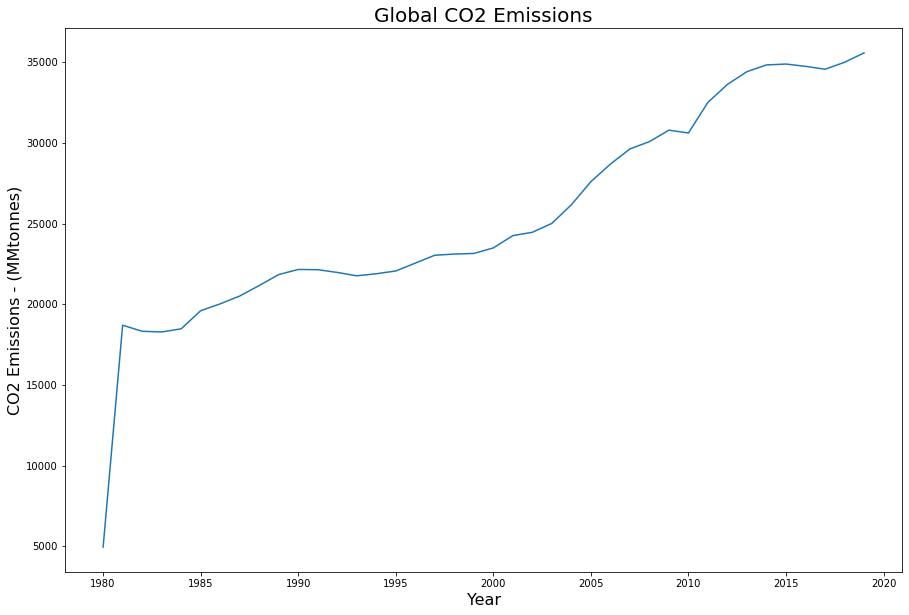

In [11]:
#What's the global trend for all C02 Emissions?
plt.figure(figsize=(15,10))
plt.plot('Year', 'CO2_emission', data = final_df.loc[(final_df['Energy_type'] == 'all_energy_types') & (final_df['Country'] == 'World')]) 
plt.ylabel('CO2 Emissions - (MMtonnes)', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.title("Global CO2 Emissions", fontsize=20)

### It looks like CO2 emissions keep climbing year after year. Could this be due to population?

# Results

## Question 1

## What is the direct impact of population growth w/o accounting for energy type to CO2

In [12]:
# create a new dataframe that contains total co2 emission by country

df_country = pd.DataFrame(energy.groupby(['Country'])['CO2_emission'].sum())
df_country.reset_index(inplace=True)
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       231 non-null    object 
 1   CO2_emission  231 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.7+ KB


In [13]:
#confirm dataframe contains the total CO2 emission by country
df_country.sort_values(by='CO2_emission', ascending=False, inplace=True)

# top 10 countries
df_country_top10 = df_country[1:10]
df_country_top10

Country  CO2_emission
219    United States    423,207.73
40             China    395,557.12
70   Former U.S.S.R.     91,021.57
169           Russia     90,530.53
106            Japan     88,480.35
98             India     79,810.64
78           Germany     48,090.99
218   United Kingdom     43,252.77
35            Canada     39,250.52

/var/folders/n7/4060w1lj1gj5d9wlf7l4y9crmwh0r3/T/ipykernel_61216/3165082790.py:7: UserWarning:

FixedFormatter should only be used together with FixedLocator



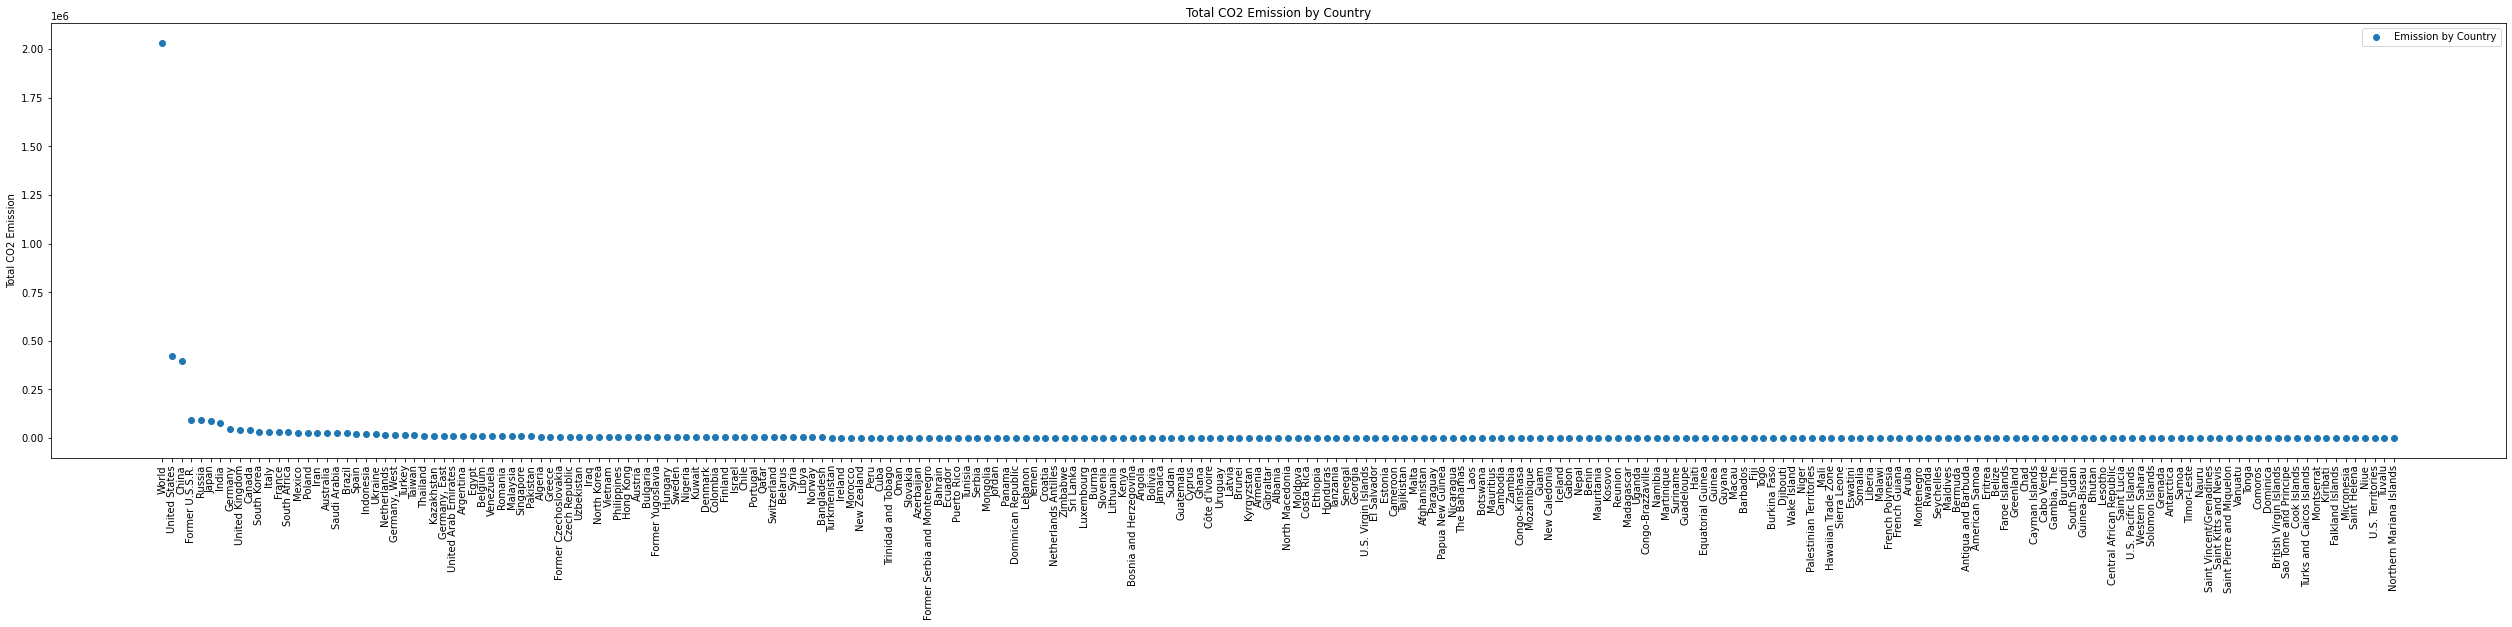

In [14]:
# all countries including world.

fig = plt.figure(figsize= (44,8))
ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter('Country', 'CO2_emission', label='Emission by Country', data = df_country)
ax1.legend()
ax1.set_xticklabels(df_country['Country'],rotation=90)
ax1.set_ylabel('Total CO2 Emission')
ax1.set_title('Total CO2 Emission by Country')

#Use plot co-ordinates to place country names next to the two top polluting countries
# ax1.text(41,390000, 'China')
# ax1.text(220,420000, 'USA')
pass

/var/folders/n7/4060w1lj1gj5d9wlf7l4y9crmwh0r3/T/ipykernel_61216/3537105445.py:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



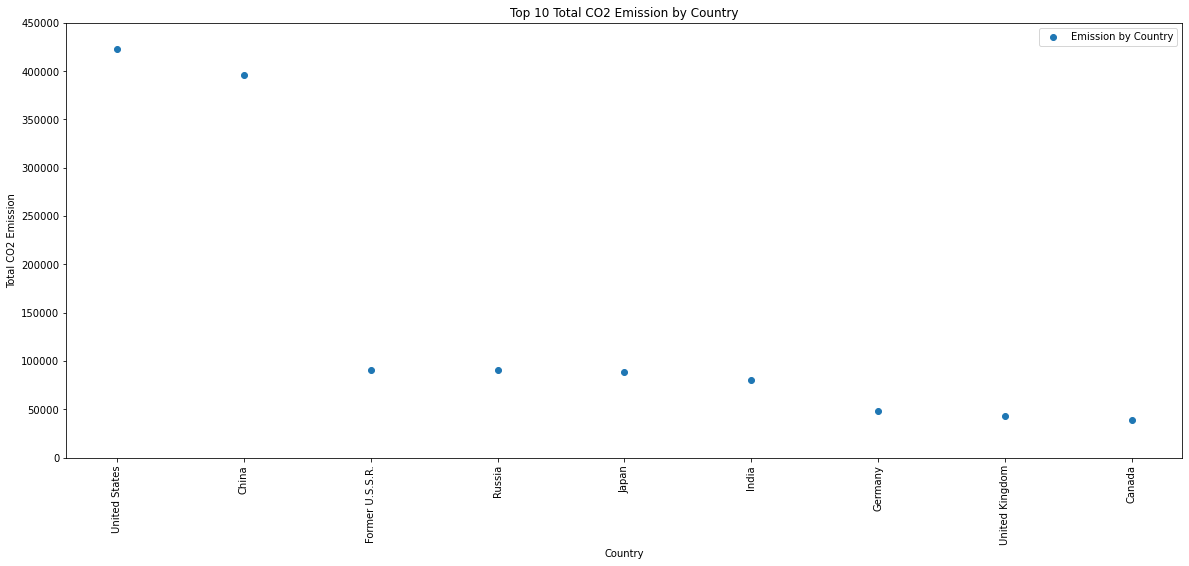

In [15]:
# Plot Total emission by country - Top 10

fig = plt.figure(figsize= (20,8))
ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter('Country', 'CO2_emission', label='Emission by Country', data = df_country_top10)
ax1.legend()
ax1.set_ylim((0,450000))
ax1.set_xticklabels(df_country_top10['Country'],rotation=90)
ax1.set_ylabel('Total CO2 Emission')
ax1.set_xlabel('Country')
ax1.set_title('Top 10 Total CO2 Emission by Country')
#Use plot co-ordinates to place country names next to the two top polluting countries
# ax1.text(41,390000, 'China')
# ax1.text(220,420000, 'USA')
pass

In [16]:
#Restructuring the data to review the changes between CO2 emission and Population, grouped by country and year
#These data frames are used to drill down and look at annual CO2 emission by country
#These views provide deep insight at country level 

df_test = final_df.groupby(['Country', 'Year'])['CO2_emission'].sum()
df_test_pop = final_df.groupby(['Country', 'Year'])['Population'].unique()
type(df_test_pop)

pandas.core.series.Series

In [17]:
#Converting series to dataframe for groupby population

energy_df_pop = pd.DataFrame(df_test_pop)
energy_df_pop.head()

Population
Country     Year           
Afghanistan 1980  [13356.5]
            1981  [13171.7]
            1982  [12882.5]
            1983  [12537.7]
            1984  [12204.3]

In [18]:
#Converting series to dataframe for groupby CO2 emission

energy_df = pd.DataFrame(df_test)
energy_df.head()

CO2_emission
Country     Year              
Afghanistan 1980          0.00
            1981          2.65
            1982          3.02
            1983          3.32
            1984          4.12

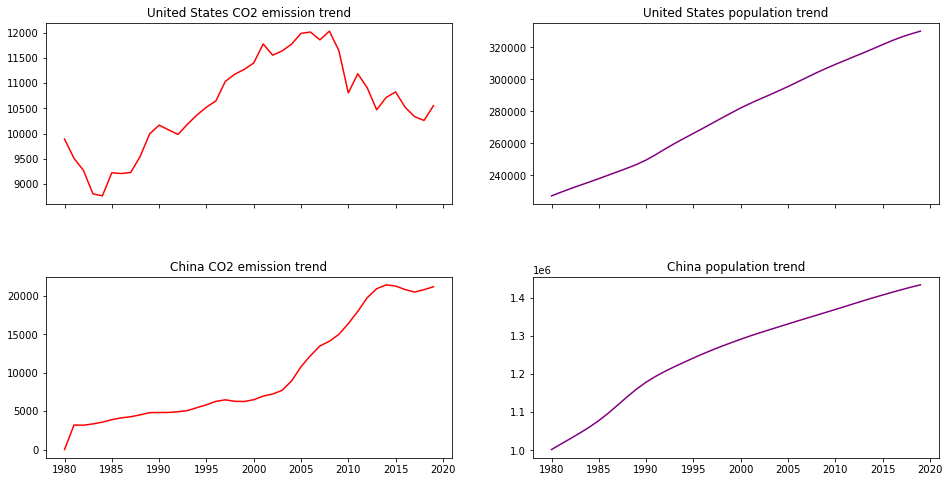

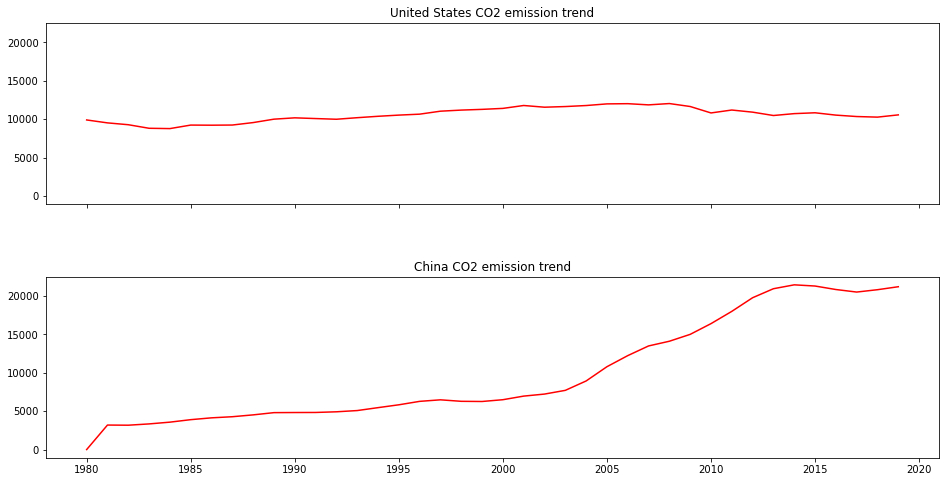

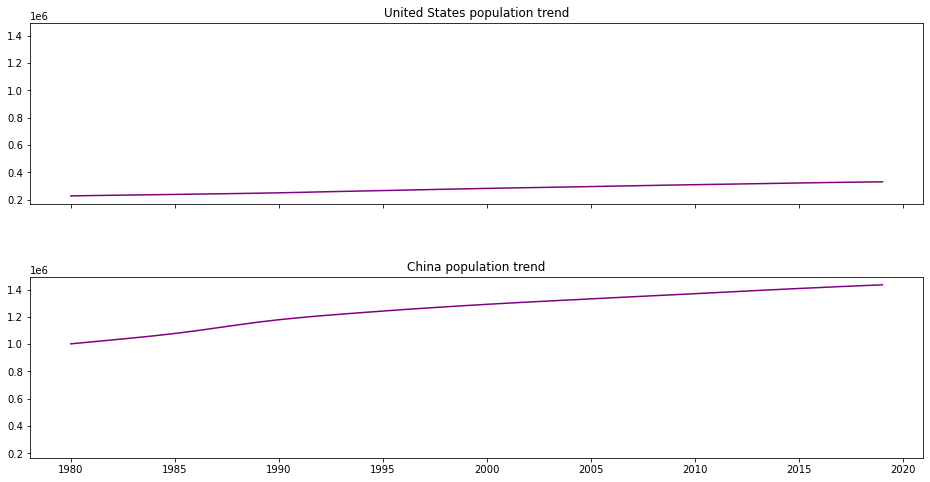

In [19]:
# Plot for top two countries for total CO2 emission side by side

country_list = ['United States', 'China']
fig, ax = plt.subplots(len(country_list),len(country_list), figsize= (16,8), sharex=True)
fig.subplots_adjust(hspace = 0.4)
ax[0][0].plot(energy_df.loc['United States'], color="red")
ax[0][0].set_title('United States CO2 emission trend')
ax[0][1].plot(energy_df_pop.loc['United States'], color="purple")
ax[0][1].set_title('United States population trend')

ax[1][0].plot(energy_df.loc['China'], color="red")
ax[1][0].set_title('China CO2 emission trend')
ax[1][1].plot(energy_df_pop.loc['China'], color="purple")
ax[1][1].set_title('China population trend')

fig, ax = plt.subplots(2,1, figsize= (16,8), sharex=True, sharey=True)
fig.subplots_adjust(hspace = 0.4)
ax[0].plot(energy_df.loc['United States'], color="red")
ax[0].set_title('United States CO2 emission trend')
# ax[0][1].plot(energy_df_pop.loc['United States'], color="purple")
# ax[0][1].set_title('United States population trend')

ax[1].plot(energy_df.loc['China'], color="red")
ax[1].set_title('China CO2 emission trend')
# ax[1][1].plot(energy_df_pop.loc['China'], color="purple")
# ax[1][1].set_title('China population trend')

fig, ax = plt.subplots(2,1, figsize= (16,8), sharex=True, sharey=True)
fig.subplots_adjust(hspace = 0.4)
ax[0].plot(energy_df_pop.loc['United States'], color="purple")
ax[0].set_title('United States population trend')

ax[1].plot(energy_df_pop.loc['China'], color="purple")
ax[1].set_title('China population trend')

pass

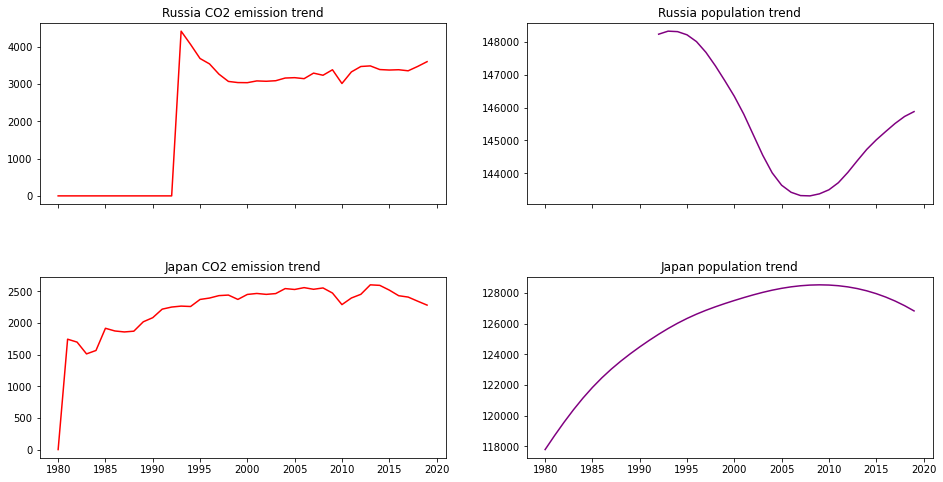

In [20]:
# Interesting trend for Japan, and Russia.
# Japan population trend on the decline.
# Russia is established and quite few years there is migration in russian population

fig, ax = plt.subplots(len(country_list),len(country_list), figsize= (16,8), sharex=True)
fig.subplots_adjust(hspace = 0.4)
ax[0][0].plot(energy_df.loc['Russia'], color="red")
ax[0][0].set_title('Russia CO2 emission trend')
ax[0][1].plot(energy_df_pop.loc['Russia'], color="purple")
ax[0][1].set_title('Russia population trend')

ax[1][0].plot(energy_df.loc['Japan'], color="red")
ax[1][0].set_title('Japan CO2 emission trend')
ax[1][1].plot(energy_df_pop.loc['Japan'], color="purple")
ax[1][1].set_title('Japan population trend')

# country_list = ['Japan', 'Russia']
# fig, ax = plt.subplots(len(country_list),len(country_list), figsize= (16,8), sharex=True)
# fig.subplots_adjust(hspace = 0.4)
# for index, country in enumerate(country_list):
#     ax[index - 1][index - 1].plot(energy_df_pop.loc[country], color="purple")
#     ax[index - 1][index].plot(energy_df.loc[country], color="red")
#     ax[index - 1][index - 1].set_title(f'{country} population trend')
#     ax[index - 1][index].set_title(f'{country} CO2 emission trend')

pass

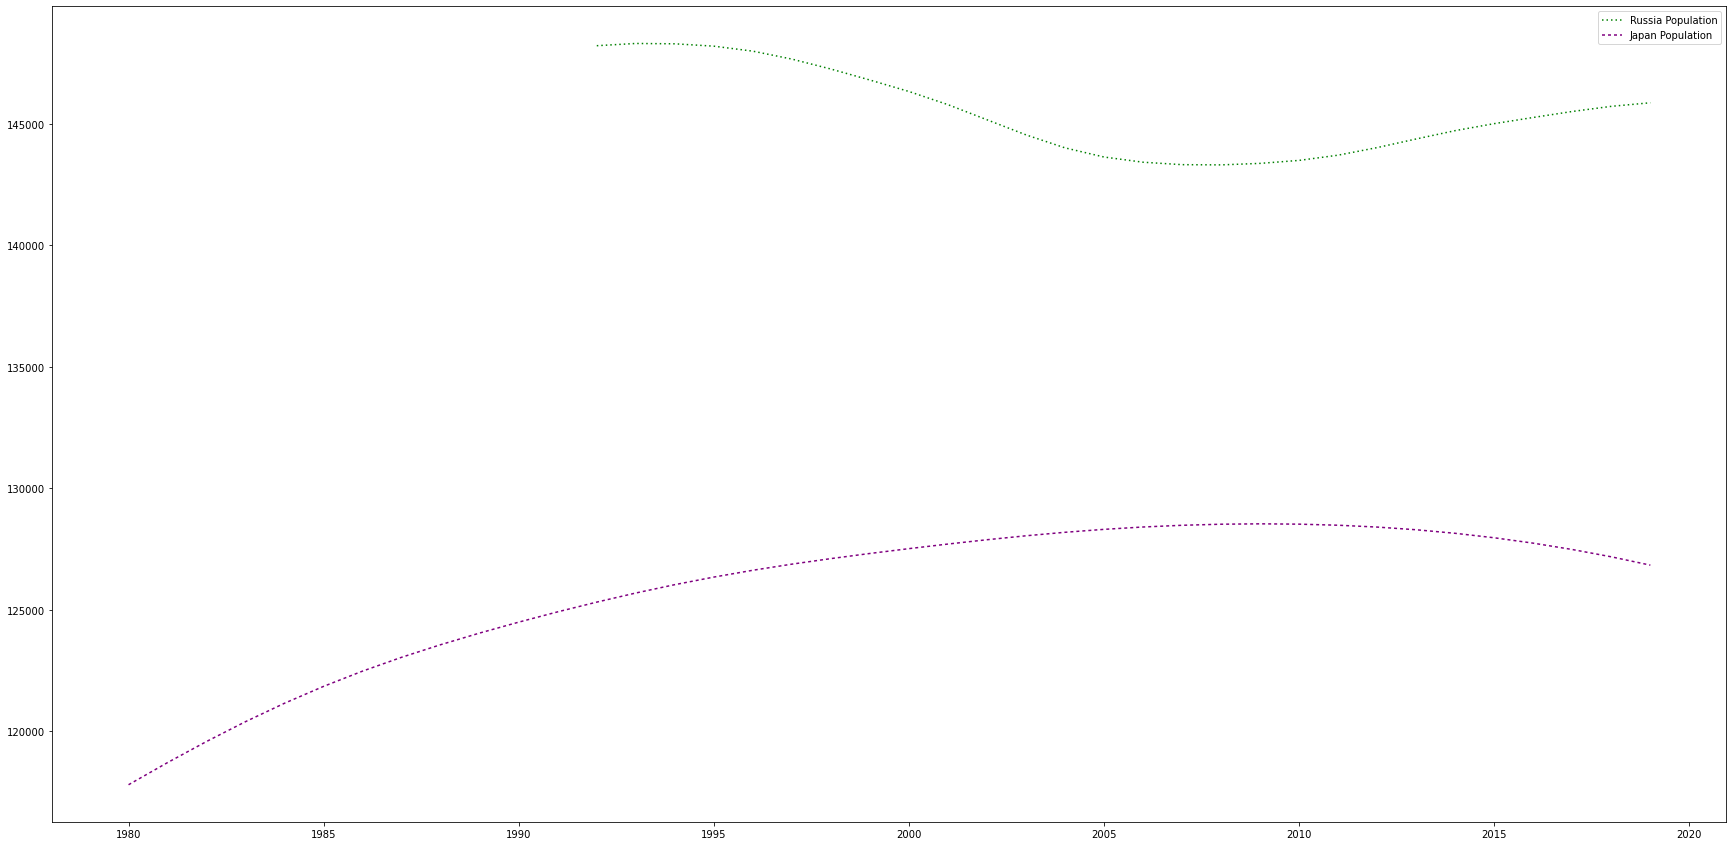

In [21]:
plt.figure(figsize=(30,15))

# plt.plot(energy_df.loc['Russia'], color = 'blue', linestyle = (0,(1,1)), label = "Russia CO2 emission")
# plt.plot(energy_df.loc['Japan'], color = 'red', linestyle = (0,(2,1)), label = "Japan CO2 emission")

plt.plot(energy_df_pop.loc['Russia'], color = 'green', linestyle = (0,(1,2)), label = "Russia Population")
plt.plot(energy_df_pop.loc['Japan'], color = 'purple', linestyle = (0,(2,2)), label = "Japan Population")
plt.legend()

pass


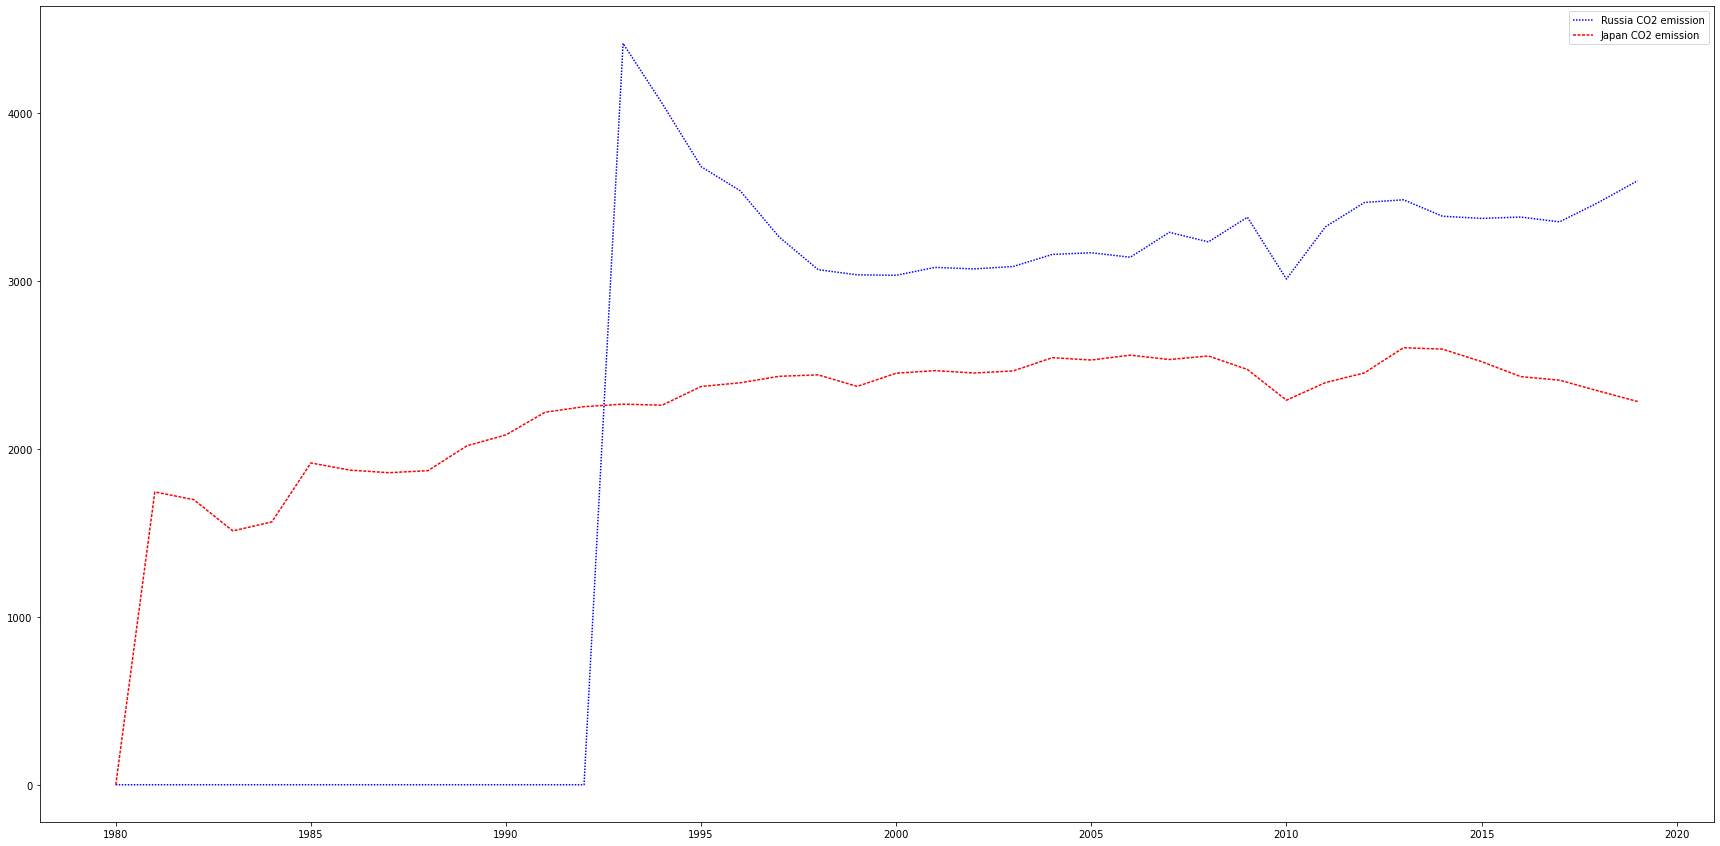

In [22]:
plt.figure(figsize=(30,15))

plt.plot(energy_df.loc['Russia'], color = 'blue', linestyle = (0,(1,1)), label = "Russia CO2 emission")
plt.plot(energy_df.loc['Japan'], color = 'red', linestyle = (0,(2,1)), label = "Japan CO2 emission")

plt.legend()

pass

## What trends are we seeing in the adoption of different energy types across countries are these trends different based on the country income group - low, medium, high

In [23]:
energy_by_income = pd.DataFrame(final_df.groupby(['IncomeGroup', 'Energy_type'])['CO2_emission'].sum())
energy_by_income.reset_index(inplace=True)
energy_by_income.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   IncomeGroup   24 non-null     object 
 1   Energy_type   24 non-null     object 
 2   CO2_emission  24 non-null     float64
dtypes: float64(1), object(2)
memory usage: 704.0+ bytes


In [24]:
#Confirm dataframe conatins the correct columns, and structure
energy_by_income.head(24)

IncomeGroup                Energy_type  CO2_emission
0           High income           all_energy_types    470,540.05
1           High income                       coal    142,987.42
2           High income                natural_gas    103,977.27
3           High income                    nuclear          0.00
4           High income  petroleum_n_other_liquids    223,575.37
5           High income         renewables_n_other          0.00
6            Low income           all_energy_types      1,553.59
7            Low income                       coal         97.66
8            Low income                natural_gas         49.57
9            Low income                    nuclear          0.00
10           Low income  petroleum_n_other_liquids      1,406.37
11           Low income         renewables_n_other          0.00
12  Lower middle income           all_energy_types     85,113.25
13  Lower middle income                       coal     37,721.59
14  Lower middle income                natural_gas     15,936.57
15  Lower middle income                    nuclear          0.00
16  Lower middle income  petroleum_n_other_liquids     31,455.08
17  Lower middle income         renewables_n_other          0.00
18  Upper middle income           all_energy_types    283,082.84
19  Upper middle income                       coal    190,202.14
20  Upper middle income                natural_gas     20,267.37
21  Upper middle income                    nuclear          0.00
22  Upper middle income  petroleum_n_other_liquids     72,613.33
23  Upper middle income         renewables_n_other          0.00

In [25]:
# Low income countries have extremely small footprint to CO2 emission.
# Is this primarily because there is no manufacturing, and limited transportation, or the data is skewed with what is reported vs actuals
energy_by_income[energy_by_income['IncomeGroup'] == 'Low income']

IncomeGroup                Energy_type  CO2_emission
6   Low income           all_energy_types      1,553.59
7   Low income                       coal         97.66
8   Low income                natural_gas         49.57
9   Low income                    nuclear          0.00
10  Low income  petroleum_n_other_liquids      1,406.37
11  Low income         renewables_n_other          0.00

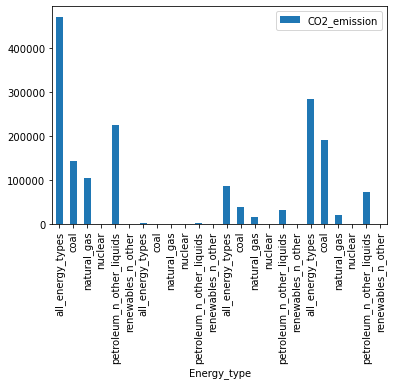

In [26]:
# Plot below x axis is high income, low income, lower middle income, and upper middle income
# not a great visualization
energy_by_income.plot(x='Energy_type', y=['CO2_emission', 'IncomeGroup'], kind='bar')
pass

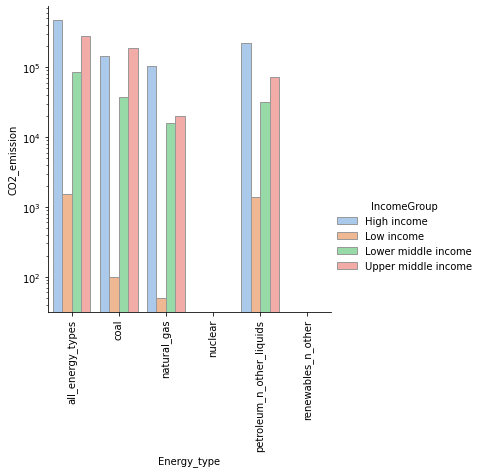

In [27]:
# use SNS for plotting the same data as above, overlaying IncomeGroup helps reduce one dimension
# use log scale to ensure that low income CO2 emissions are visible.

# sns.histplot(data=energy_by_income)
g = sns.catplot(x="Energy_type", y="CO2_emission", hue="IncomeGroup", kind="bar", 
            palette="pastel", edgecolor=".6", data=energy_by_income, log=True)
plt.xticks(rotation=90)

pass

It is evident high income countries generate most of the energy using petroleum based sources, whereas upper middle income still relies heavily on coal.

## How does the energy trend look by world regions

It is worth noting that the dataset we have used does not categorize all world countries by Region designation, therefore the data analysis and visualizations represent a trend of 130 countries

In [28]:
region_c02_totals = final_df.groupby(['Region'])['CO2_emission'].sum()
region_c02_totals

Region
East Asia & Pacific          576,173.66
Europe & Central Asia        344,944.39
Latin America & Caribbean     88,997.37
Middle East & North Africa    73,527.22
North America                462,504.92
South Asia                    91,898.30
Sub-Saharan Africa            42,533.58
Name: CO2_emission, dtype: float64

In [29]:
region_co2_emission = pd.DataFrame(final_df.groupby(['Region'])['CO2_emission'].sum())
region_co2_emission.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, East Asia & Pacific to Sub-Saharan Africa
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CO2_emission  7 non-null      float64
dtypes: float64(1)
memory usage: 112.0+ bytes


In [30]:
region_country = pd.DataFrame(final_df.groupby(['Region'])['Country'].nunique())
region_country.head()

Country
Region                             
East Asia & Pacific              27
Europe & Central Asia            48
Latin America & Caribbean        33
Middle East & North Africa       16
North America                     3

In [31]:
region_population = pd.DataFrame(final_df.groupby(['Region'])['Population'].sum())
region_population.head()

Population
Region                                   
East Asia & Pacific        452,441,465.35
Europe & Central Asia      134,937,445.23
Latin America & Caribbean  117,038,762.23
Middle East & North Africa  35,280,282.78
North America               74,318,655.36

In [32]:
# Russia is not given a Region designation and is missing from the trend

final_df[final_df['Country'] == 'Russia'].head()

Country                Energy_type  Year  Energy_consumption  \
25206  Russia           all_energy_types  1980                 NaN   
25207  Russia                       coal  1980                 NaN   
25208  Russia                natural_gas  1980                 NaN   
25209  Russia  petroleum_n_other_liquids  1980                 NaN   
25210  Russia                    nuclear  1980                 NaN   

       Energy_production  GDP  Population  Energy_intensity_per_capita  \
25206                NaN  NaN         NaN                          NaN   
25207                NaN  NaN         NaN                          NaN   
25208                NaN  NaN         NaN                          NaN   
25209                NaN  NaN         NaN                          NaN   
25210                NaN  NaN         NaN                          NaN   

       Energy_intensity_by_GDP  CO2_emission  CO2_capita IncomeGroup Region  \
25206                      NaN           NaN         NaN         NaN    NaN   
25207                      NaN           NaN         NaN         NaN    NaN   
25208                      NaN           NaN         NaN         NaN    NaN   
25209                      NaN           NaN         NaN         NaN    NaN   
25210                      NaN          0.00         NaN         NaN    NaN   

      Country_code  
25206          NaN  
25207          NaN  
25208          NaN  
25209          NaN  
25210          NaN

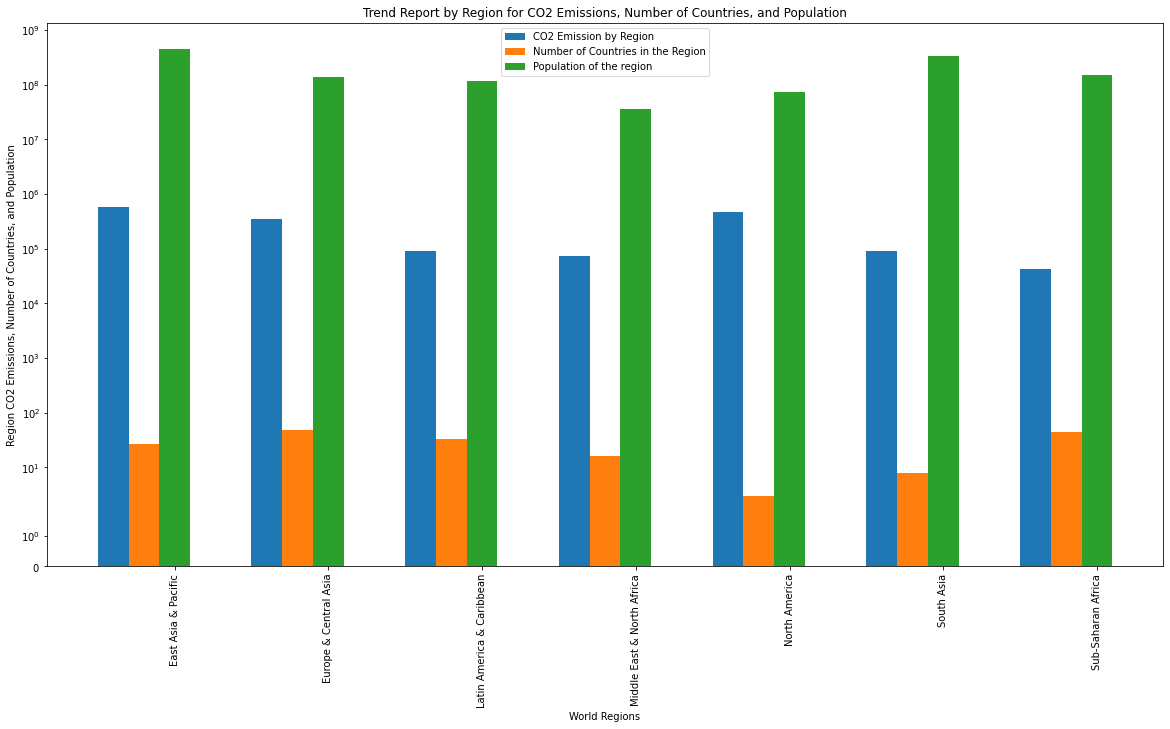

In [33]:
#Plot CO2 Emission by Region, and also represent number of countries represented in the region.

fig, ax=plt.subplots(1, 1, figsize=(20, 10))
x_axis = np.arange(len(region_country.index))
ax.set_yscale('symlog')

plt.bar(x_axis - 0.4, region_co2_emission['CO2_emission'], 0.2, label = 'CO2 Emission by Region')
plt.bar(x_axis - 0.2, region_country['Country'], 0.2, label = 'Number of Countries in the Region')
plt.bar(x_axis, region_population['Population'], 0.2, label = 'Population of the region')

ax.set_xlabel('World Regions')
ax.set_ylabel('Region CO2 Emissions, Number of Countries, and Population')
ax.set_title('Trend Report by Region for CO2 Emissions, Number of Countries, and Population')
ax.legend()
  
plt.xticks(x_axis, region_country.index, rotation=90)
plt.show()

pass

In [34]:
final_df_v3.head()

Country                Energy_type  Year  Energy_consumption  \
0   World           all_energy_types  1980              292.90   
1   World                       coal  1980               78.66   
2   World                natural_gas  1980               53.87   
3   World  petroleum_n_other_liquids  1980              132.06   
4   World                    nuclear  1980                7.58   

   Energy_production       GDP   Population  Energy_intensity_per_capita  \
0             296.34 27,770.91 4,298,126.52                        68.15   
1              80.11 27,770.91 4,298,126.52                        68.15   
2              54.76 27,770.91 4,298,126.52                        68.15   
3             133.11 27,770.91 4,298,126.52                        68.15   
4               7.58 27,770.91 4,298,126.52                        68.15   

   Energy_intensity_by_GDP  CO2_emission  CO2_capita IncomeGroup Region  \
0                    10.55      4,946.63         NaN         NaN    NaN   
1                    10.55      1,409.79         NaN         NaN    NaN   
2                    10.55      1,081.59         NaN         NaN    NaN   
3                    10.55      2,455.24         NaN         NaN    NaN   
4                    10.55          0.00         NaN         NaN    NaN   

  Country_code  Deaths_Rate_100K  
0          WLD               NaN  
1          WLD               NaN  
2          WLD               NaN  
3          WLD               NaN  
4          WLD               NaN

## What is the trend for death rate per 100K population based on the air pollution, and is there any relationship to CO2 emission

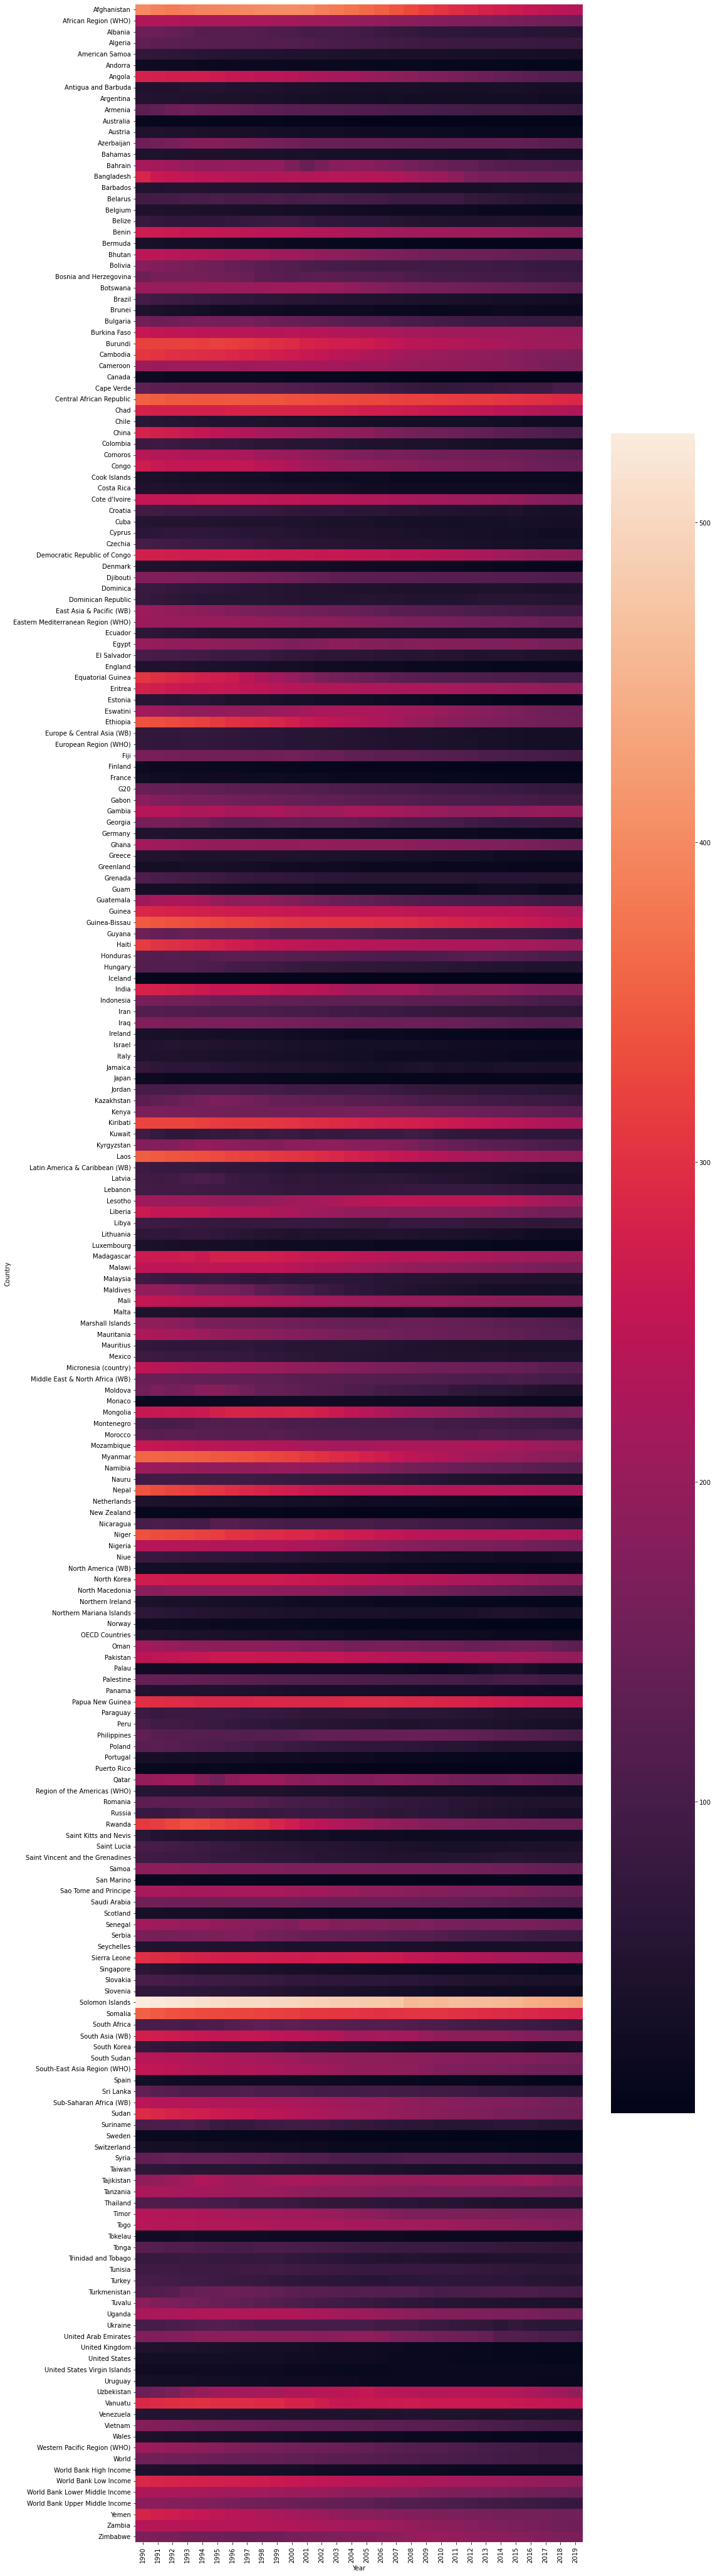

In [35]:
#Create a pivot table for the heatmap
pivot_death_rate = final_df_v3.pivot_table(index='Country', columns='Year', values='Deaths_Rate_100K')

# fig, ax = plt.subplots(figsize=(20,15))       
# sns.heatmap(pivot_death_rate, ax=ax, xticklabels=True, yticklabels=True)

fontsize_point = 18
dpi = 73
matrix_height_pt = fontsize_point * pivot_death_rate.shape[0]
matrix_height_in = matrix_height_pt / dpi

top_margin = 0.03
bottom_margin = 0.03
figure_height = matrix_height_in / (1 - top_margin - bottom_margin)


fig, ax = plt.subplots(
        figsize=(16,figure_height), 
        gridspec_kw=dict(top=1-top_margin, bottom=bottom_margin))

ax = sns.heatmap(pivot_death_rate, ax=ax)

pass

In [36]:
# check the country with highest death rate per 100K by pollution. using energy_type and year as a filter.
# any energy_type can be picked all will have the same values for a given year, for a given country

country_year_deathrate_df = final_df_v3[(final_df_v3['Energy_type'] == 'nuclear') & (final_df_v3['Year'] == 2019)]
top_20_df = country_year_deathrate_df.sort_values(by=['Deaths_Rate_100K'], ascending=False).head(20)
# top_20_df

In [37]:
#top 20 countries, death rate due to air pollution for the year 2019, sorted by the highest

pivot_top20 = top_20_df.pivot_table(index='Country', columns='Year', values='Deaths_Rate_100K')
pivot_top20_df = pivot_top20.reindex(pivot_top20.sort_values(by=2019, ascending=False).index)


print(pivot_top20_df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Solomon Islands to Uzbekistan
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2019    20 non-null     float64
dtypes: float64(1)
memory usage: 320.0+ bytes
None


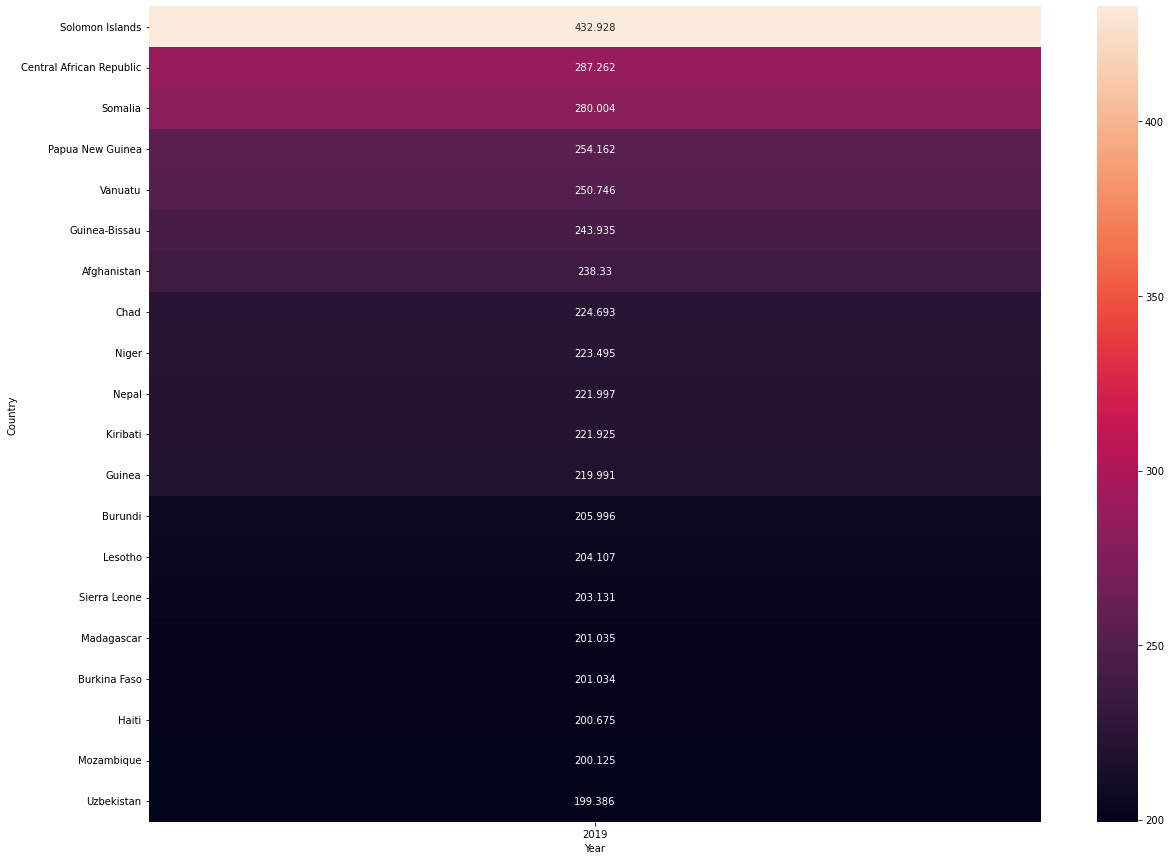

In [38]:
#plot top 20 countries, death rate due to air pollution for the year 2019

fig, ax = plt.subplots(figsize=(20,15))       
sns.heatmap(pivot_top20_df, ax=ax, xticklabels=True, yticklabels=True, annot=True, fmt='g')

pass

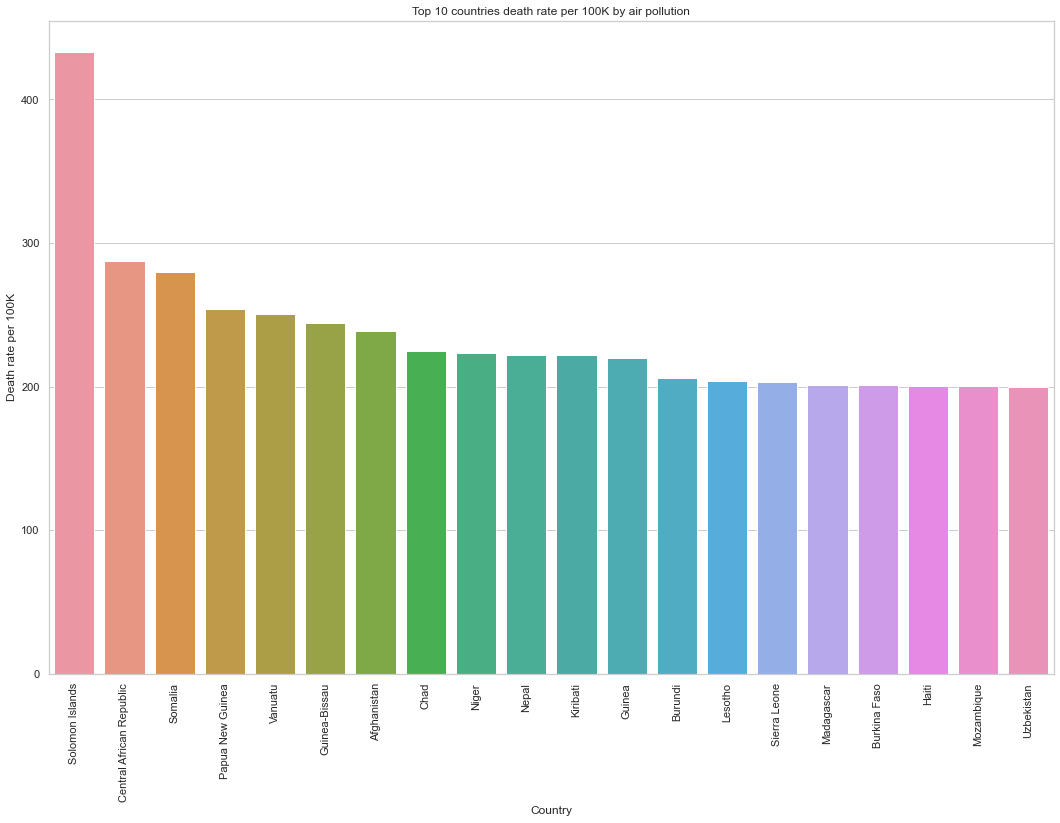

<Figure size 2520x1152 with 0 Axes>

In [39]:
# based on the review comments changed the heatmap to barplot
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
a4_dims = (18.0, 12.0)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x=pivot_top20_df.index, y=2019, data=pivot_top20_df)
ax.set(xlabel='Country', ylabel='Death rate per 100K', title='Top 10 countries death rate per 100K by air pollution')

plt.xticks(rotation=90)
plt.figure(figsize=(35,16))

pass

In [40]:
# Checking on the top 20 countries by death rate for air pollution in 2019 and comparing the CO2 emission level.
# It is clear there is no relationship between CO2 emission of the country and deaths caused by air pollution

CO2_deathrate_top20 = {}
for country in pivot_top20_df.index.get_level_values(0):
    CO2_deathrate_top20[country] = energy_df[(energy_df.index.get_level_values(1) == 2019) & 
                    (energy_df.index.get_level_values(0) == country)]['CO2_emission'].values[0]

print(CO2_deathrate_top20)

{'Solomon Islands': 0.6761241819203513, 'Central African Republic': 0.556564, 'Somalia': 1.7647813620944568, 'Papua New Guinea': 12.646574150200188, 'Vanuatu': 0.4686515837292422, 'Guinea-Bissau': 0.68369377175332, 'Afghanistan': 18.78232617377578, 'Chad': 3.4325798, 'Niger': 4.553608161533441, 'Nepal': 16.614135239510833, 'Kiribati': 0.15056414, 'Guinea': 5.961465198112638, 'Burundi': 1.35966604, 'Lesotho': 1.4352753, 'Sierra Leone': 1.9701005684728914, 'Madagascar': 6.782829417618972, 'Burkina Faso': 8.782685236295, 'Haiti': 6.915152397964942, 'Mozambique': 15.571616809536854, 'Uzbekistan': 198.77869780610285}


## World's Excess Energy

1.	Who creates the most excess energy? (Excess Energy = energy production - energy consumption)

### World Excess Energy Trend

In [13]:
#Create Excess Energy 
energy_cl = final_df.copy(deep=True)
energy_cl['Excess_energy'] = final_df['Energy_production'] - final_df['Energy_consumption']

In [14]:
#Create a new data_frame
energy_world= energy_cl[energy_cl['Country'] == "World"]
energy_world.head()

Country                Energy_type  Year  Energy_consumption  \
0     World           all_energy_types  1980              292.90   
30    World                       coal  1980               78.66   
60    World                natural_gas  1980               53.87   
90    World  petroleum_n_other_liquids  1980              132.06   
120   World                    nuclear  1980                7.58   

     Energy_production       GDP   Population  Energy_intensity_per_capita  \
0               296.34 27,770.91 4,298,126.52                        68.15   
30               80.11 27,770.91 4,298,126.52                        68.15   
60               54.76 27,770.91 4,298,126.52                        68.15   
90              133.11 27,770.91 4,298,126.52                        68.15   
120               7.58 27,770.91 4,298,126.52                        68.15   

     Energy_intensity_by_GDP  CO2_emission  CO2_capita IncomeGroup Region  \
0                      10.55      4,946.63         NaN         NaN    NaN   
30                     10.55      1,409.79         NaN         NaN    NaN   
60                     10.55      1,081.59         NaN         NaN    NaN   
90                     10.55      2,455.24         NaN         NaN    NaN   
120                    10.55          0.00         NaN         NaN    NaN   

    Country_code  Excess_energy  
0            WLD           3.44  
30           WLD           1.46  
60           WLD           0.90  
90           WLD           1.05  
120          WLD           0.00

In [15]:
#Checking to see if the energy of coal, natural gas, petro., nuclear, and renewable equal the all energy row
print('Consumed:',sum(energy_world["Energy_consumption"][1:6]))
#Checking to see if the energy of coal, natural gas, petro., nuclear, and renewable equal the all energy row
print("Produced" ,sum(energy_world["Energy_production"][1:6]))

Consumed: 292.8634213204468
Produced 296.33722758863627


In [16]:
#Create new data frame
energy_world_all = energy_world[energy_world['Energy_type']=='all_energy_types']
energy_world_all

Country       Energy_type  Year  Energy_consumption  \
0         World  all_energy_types  1980              292.90   
32880     World  all_energy_types  1981              289.40   
65760     World  all_energy_types  1982              289.69   
98640     World  all_energy_types  1983              293.73   
131520    World  all_energy_types  1984              307.23   
164400    World  all_energy_types  1985              315.43   
197280    World  all_energy_types  1986              322.18   
230160    World  all_energy_types  1987              332.75   
263040    World  all_energy_types  1988              345.56   
295920    World  all_energy_types  1989              351.35   
328800    World  all_energy_types  1990              353.54   
361680    World  all_energy_types  1991              353.89   
394560    World  all_energy_types  1992              352.85   
427440    World  all_energy_types  1993              355.68   
460320    World  all_energy_types  1994              359.52   
493200    World  all_energy_types  1995              369.36   
526080    World  all_energy_types  1996              379.19   
558960    World  all_energy_types  1997              380.36   
591840    World  all_energy_types  1998              382.49   
624720    World  all_energy_types  1999              389.69   
657600    World  all_energy_types  2000              402.38   
690480    World  all_energy_types  2001              405.22   
723360    World  all_energy_types  2002              413.97   
756240    World  all_energy_types  2003              428.50   
789120    World  all_energy_types  2004              450.69   
822000    World  all_energy_types  2005              465.29   
854880    World  all_energy_types  2006              480.02   
887760    World  all_energy_types  2007              493.06   
920640    World  all_energy_types  2008              499.79   
953520    World  all_energy_types  2009              495.07   
986400    World  all_energy_types  2010              526.73   
1019280   World  all_energy_types  2011              540.50   
1052160   World  all_energy_types  2012              551.60   
1085040   World  all_energy_types  2013              561.09   
1117920   World  all_energy_types  2014              566.13   
1150800   World  all_energy_types  2015              567.33   
1183680   World  all_energy_types  2016              572.16   
1216560   World  all_energy_types  2017              584.20   
1249440   World  all_energy_types  2018              597.74   
1282320   World  all_energy_types  2019              601.04   

         Energy_production        GDP   Population  \
0                   296.34  27,770.91 4,298,126.52   
32880               291.29  28,665.82 4,377,059.56   
65760               290.12  28,801.77 4,456,829.97   
98640               293.05  29,617.58 4,537,793.89   
131520              308.92  31,097.25 4,572,800.78   
164400              316.46  32,289.04 4,657,357.40   
197280              326.75  33,425.37 4,745,135.93   
230160              334.38  34,792.99 4,835,605.85   
263040              347.41  42,106.60 4,927,545.08   
295920              354.01  44,075.64 5,056,794.37   
328800              357.84  49,229.89 5,294,251.49   
361680              355.13  50,156.76 5,396,473.68   
394560              353.94  51,016.35 5,481,774.19   
427440              354.59  52,108.50 5,581,568.66   
460320              360.67  53,646.34 5,663,996.16   
493200              368.58  55,384.83 5,745,283.94   
526080              377.75  57,529.16 5,826,303.73   
558960              382.30  59,832.33 5,906,491.03   
591840              386.79  61,263.86 5,985,040.95   
624720              386.64  63,358.52 6,063,581.75   
657600              399.86  66,398.36 6,141,880.60   
690480              405.55  67,935.21 6,220,160.57   
723360              407.36  69,813.84 6,298,597.47   
756240              423.13  72,365.06 6,377,289.07   
789120              445.45  76,045.71 6,456,652.85   
822000              

In [17]:
energy_world_all['Energy_production'].min(), energy_world_all['Energy_production'].max()

(290.1205665759991, 611.5089686476265)

In [18]:
#looking at 1983 energy and seeing if the math adds up with production and consumtion and excess energy
energy.iloc[4158:4164]

Country                Energy_type  Year  Energy_consumption  \
4158   World           all_energy_types  1983              293.73   
4159   World                       coal  1983               82.63   
4160   World                natural_gas  1983               55.15   
4161   World  petroleum_n_other_liquids  1983              122.22   
4162   World                    nuclear  1983               10.72   
4163   World         renewables_n_other  1983               22.95   

      Energy_production       GDP   Population  Energy_intensity_per_capita  \
4158             293.05 29,617.58 4,537,793.89                        64.73   
4159              83.69 29,617.58 4,537,793.89                        64.73   
4160              56.12 29,617.58 4,537,793.89                        64.73   
4161             119.27 29,617.58 4,537,793.89                        64.73   
4162              10.72 29,617.58 4,537,793.89                        64.73   
4163              23.26 29,617.58 4,537,793.89                        64.73   

      Energy_intensity_by_GDP  CO2_emission  
4158                     9.92     18,284.00  
4159                     9.92      7,637.06  
4160                     9.92      2,854.97  
4161                     9.92      7,791.97  
4162                     9.92          0.00  
4163                     9.92          0.00

In [19]:
#Testing energy by the world for 1983
x = sum(energy.iloc[4159:4164]['Energy_consumption'])
print('Energy Consumed in 1983:', x)

y = sum(energy.iloc[4159:4164]['Energy_production'])
print('Energy Produced in 1983:', y)

Excess = y-x
print("Excess:", Excess)

Energy Consumed in 1983: 293.6619623661284
Energy Produced in 1983: 293.04664693715233
Excess: -0.6153154289760892


In [20]:
#Testing by all countries with all energy types data rowss

#Filter out world from data set
energy_countries = energy[energy['Country']!='World']

#Filter for all_energy_types from data set
energy_countries = energy_countries[energy_countries['Energy_type']=='all_energy_types']

#Filter for the year of 1983
energy_countries_1983 = energy_countries[energy_countries['Year']== 1983]
# energy_countries_1983.head(10)
# energy_countries_1983.info()

x = energy_countries_1983['Energy_consumption'].sum(skipna= True)
print('Energy Consumed in 1983:', x)

y = energy_countries_1983['Energy_production'].sum(skipna= True)
print('Energy Produced in 1983:', y)

Excess = y-x
print("Excess:", Excess)

Energy Consumed in 1983: 293.73162574512844
Energy Produced in 1983: 293.0466469371524
Excess: -0.6849788079760515


In [21]:
#Testing by all countries

#Filter out world from data set
energy_countries = energy[energy['Country']!='World']

#Filter out all_energy_types from data set
energy_countries = energy_countries[energy_countries['Energy_type']!='all_energy_types']

#Filter for the year of 1983
energy_countries_1983 = energy_countries[energy_countries['Year']== 1983]
# energy_countries_1983.head(10)
# energy_countries_1983.info()

x = energy_countries_1983['Energy_consumption'].sum(skipna= True)
print('Energy Consumed in 1983:', x)

y = energy_countries_1983['Energy_production'].sum(skipna= True)
print('Energy Produced in 1983:', y)

Excess= y-x
print("Excess:", Excess)

Energy Consumed in 1983: 293.6619623661284
Energy Produced in 1983: 293.04664693715233
Excess: -0.6153154289760892


Assume: All energy types represents the sum of the energies

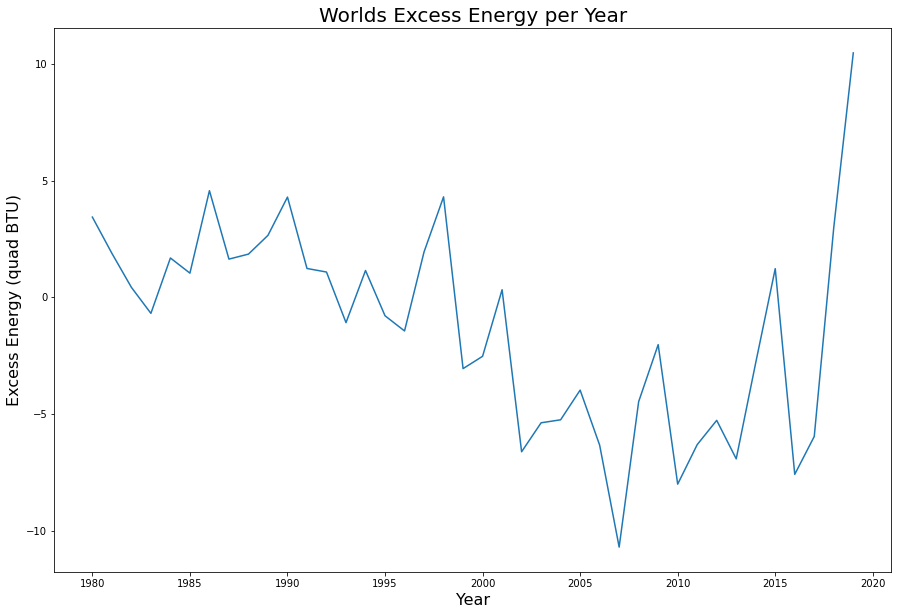

In [22]:
#Plotting Worlds Excess Energy per Year
plt.figure(figsize=(15,10))
plt.plot('Year', 'Excess_energy', data = energy_world_all)
plt.ylabel('Excess Energy (quad BTU)', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.title("Worlds Excess Energy per Year", fontsize=20)
# plt.ylim(0, 20)
# plt.xlim(1980, 1982)
pass

In [23]:
#Test if the sum of all the excess energy will equal to zero.
sum(energy_world_all.Excess_energy)

-48.8739477645733

Based on the results you can conclude that there is some issues with the listed energy production and energy consumption. This can be due to measured energy errors, entry errors, or misreported energy.

### Cumulative Excess Energy per country

Ignoring any cumulative excess energy that is less than or equal to 0, due to error in measurements or countries that do not have any excess energy. For countries that have a net negative excess energy could be rantionalized if they purchase energy from another country which has a net positive excess energy.

In [24]:
#Filter out the world energy and only want all energy types
energy_all_coun = energy_cl[energy_cl['Energy_type'] == 'all_energy_types']
energy_all_coun = energy_all_coun[energy_all_coun.Country != 'World']

#Create Cumulative Excess Energy DataFrame
excess = energy_all_coun.groupby('Country').sum()
excess = excess[excess.Excess_energy > 0].sort_values('Excess_energy' ,ascending = False)
excess.head(5)

Year  Energy_consumption  Energy_production       GDP  \
Country                                                                
Saudi Arabia  79980              230.04             855.38 37,377.83   
Russia        79980              829.05           1,425.19 77,967.38   
Norway        79980               70.60             315.05  9,345.01   
Australia     79980              186.46             386.64 29,503.00   
Iran          79980              234.82             420.44 26,351.69   

               Population  Energy_intensity_per_capita  \
Country                                                  
Saudi Arabia   851,811.77                    10,156.59   
Russia       4,073,572.70                     5,699.29   
Norway         182,877.51                    15,450.27   
Australia      776,348.26                     9,510.51   
Iran         2,548,728.80                     3,434.22   

              Energy_intensity_by_GDP  CO2_emission  CO2_capita  Excess_energy  
Country                                                                         
Saudi Arabia                   175.15     12,620.36      413.33         625.34  
Russia                         314.50     45,265.27        0.00         596.14  
Norway                         318.64      1,478.56      231.36         244.45  
Australia                      265.98     12,841.82      504.81         200.19  
Iran                           254.67     13,230.83        0.00         185.62

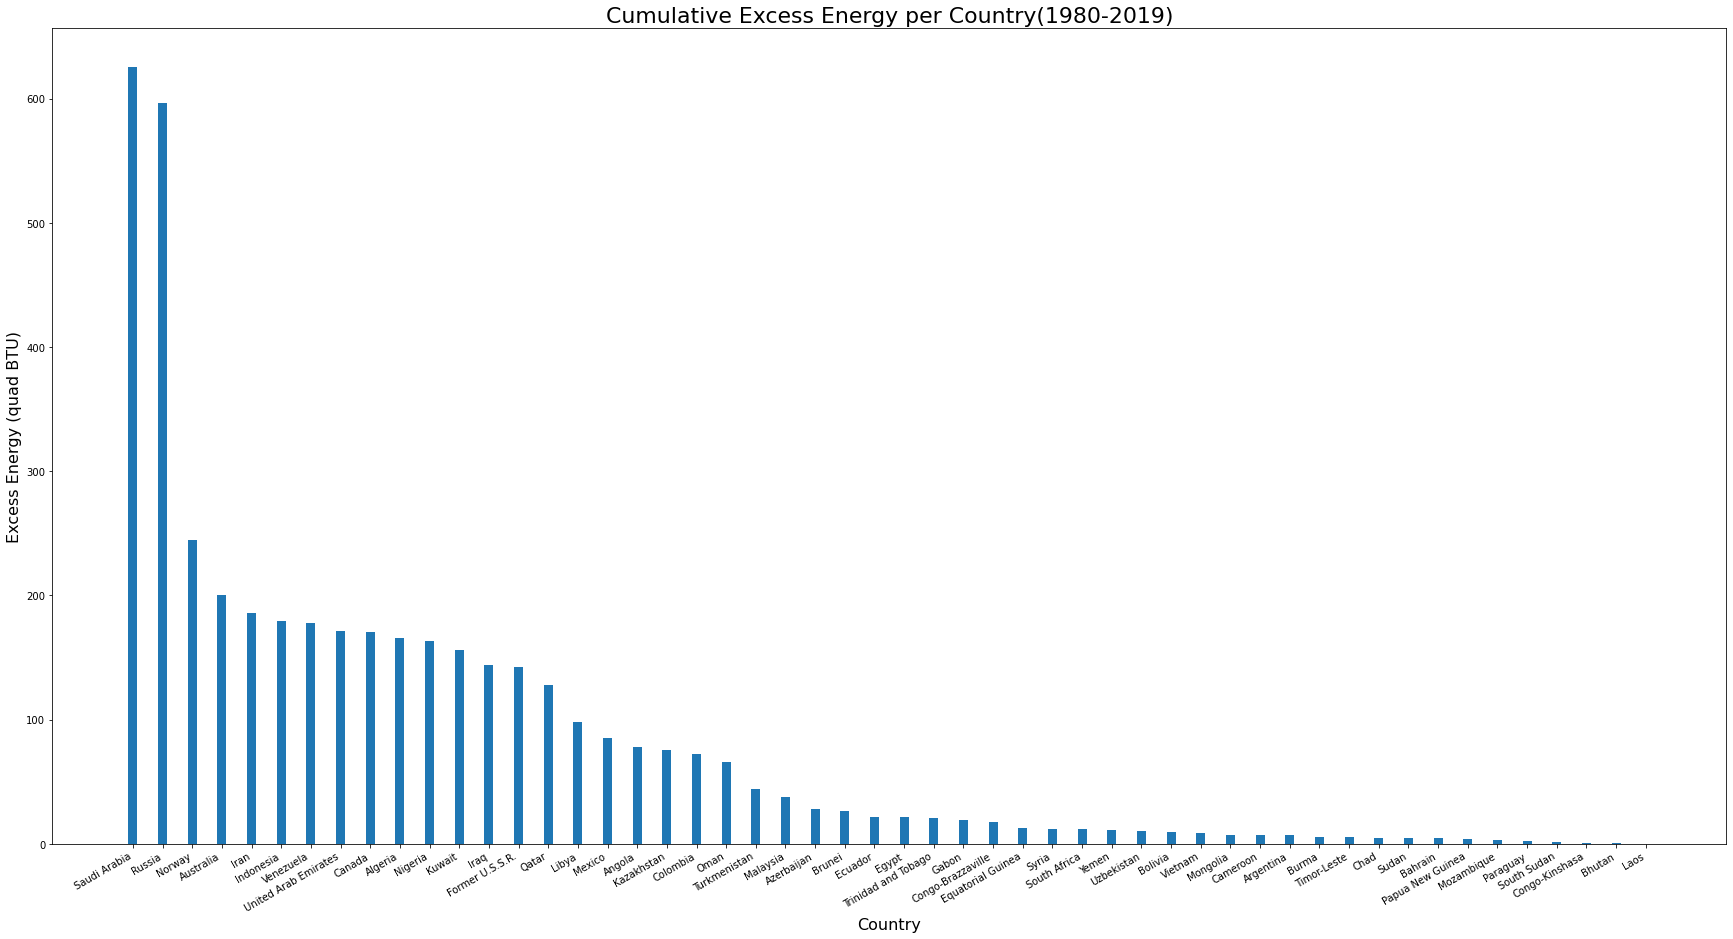

In [25]:
#Bar chart for excess energy countries
plt.figure(figsize=(30,15))
plt.bar(excess.index, excess['Excess_energy'], width = 0.3)
plt.xticks(rotation=30, ha='right')
plt.title("Cumulative Excess Energy per Country(1980-2019)", fontsize=22)
plt.ylabel('Excess Energy (quad BTU)', fontsize=16)
plt.xlabel('Country', fontsize=16)

pass

### Top energy Wasters

In [26]:
#Create new data frame of all the countries and all energy type
energy_top = energy_cl.sort_values("Excess_energy", axis = 0 , ascending = False)
energy_top = energy_top[energy_top['Energy_type'] == 'all_energy_types']
energy_top = energy_top[energy_top['Country'] != 'World']
energy_top = energy_top.sort_values("Year", axis = 0 , ascending = False)

#Create Data Frames for top 5 countries
energy_Russia = energy_top[(energy_top['Country'] == "Russia")]
energy_Russia = energy_Russia[energy_Russia['Excess_energy'].notna()]
energy_Saudi = energy_top[energy_top['Country'] == "Saudi Arabia"]
energy_Norway = energy_top[energy_top['Country'] == "Norway"]
energy_Australia = energy_top[energy_top['Country'] == "Australia"]
energy_Iran = energy_top[energy_top['Country'] == "Iran"]

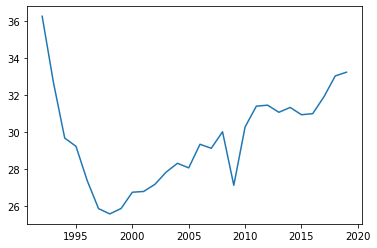

In [33]:
plt.plot(energy_Russia['Year'] ,energy_Russia['Energy_consumption'])

In [32]:
energy_top

Country       Energy_type  Year  Energy_consumption  \
1307526          Russia  all_energy_types  2019               33.25   
1307742           Samoa  all_energy_types  2019                0.01   
1292634   Faroe Islands  all_energy_types  2019                0.01   
1288458  Cayman Islands  all_energy_types  2019                0.01   
1291908         Eritrea  all_energy_types  2019                0.01   
...                 ...               ...   ...                 ...   
11424       Gambia, The  all_energy_types  1980                0.00   
32700          Zimbabwe  all_energy_types  1980                0.14   
15780             Japan  all_energy_types  1980               15.81   
31596     United States  all_energy_types  1980               78.02   
20130          Mongolia  all_energy_types  1980                0.15   

         Energy_production      GDP  Population  Energy_intensity_per_capita  \
1307526              64.28 3,770.42  145,876.30                       227.91   
1307742               0.00     1.09      197.43                        27.11   
1292634               0.00      NaN         NaN                         0.00   
1288458               0.00     3.78       64.92                       175.58   
1291908               0.00     6.02    3,505.71                         3.22   
...                    ...      ...         ...                          ...   
11424                 0.00      NaN      637.25                         3.51   
32700                 0.11      NaN    7,408.63                        19.10   
15780                 2.34 2,642.63  117,799.50                       134.20   
31596                67.15 7,080.75  227,119.00                       343.53   
20130                 0.13      NaN    1,689.62                        88.05   

         Energy_intensity_by_GDP  CO2_emission  CO2_capita  \
1307526                     8.82      1,798.24         NaN   
1307742                     4.91          0.32        1.52   
1292634                     0.00          0.87         NaN   
1288458                     3.02          0.67         NaN   
1291908                     1.87          0.74        0.25   
...                          ...           ...         ...   
11424                       0.00           NaN         NaN   
32700                       0.00           NaN         NaN   
15780                       5.98           NaN         NaN   
31596                      11.02      4,946.63         NaN   
20130                       0.00           NaN         NaN   

                 IncomeGroup                     Region Country_code  \
1307526                  NaN                        NaN          NaN   
1307742  Lower middle income        East Asia & Pacific          WSM   
1292634          High income      Europe & Central Asia          FRO   
1288458          High income  Latin America & Caribbean          CYM   
1291908           Low income         Sub-Saharan Africa          ERI   
...                      ...                        ...          ...   
11424             Low income         Sub-Saharan Africa          GMB   
32700    Lower middle income         Sub-Saharan Africa          ZWE   
15780            High income        East Asia & Pacific          JPN   
31596            High income              North America          USA   
20130    Lower middle income        East Asia & Pacific          MNG   

         Excess_energy  
1307526          31.03  
1307742          -0.00  
1292634          -0.01  
1288458          -0.01  
1291908          -0.01  
...                ...  
11424            -0.00  
32700            -0.03  
15780           -13.46  
31596           -10.87  
20130            -0.02  

[9200 rows x 15 columns]

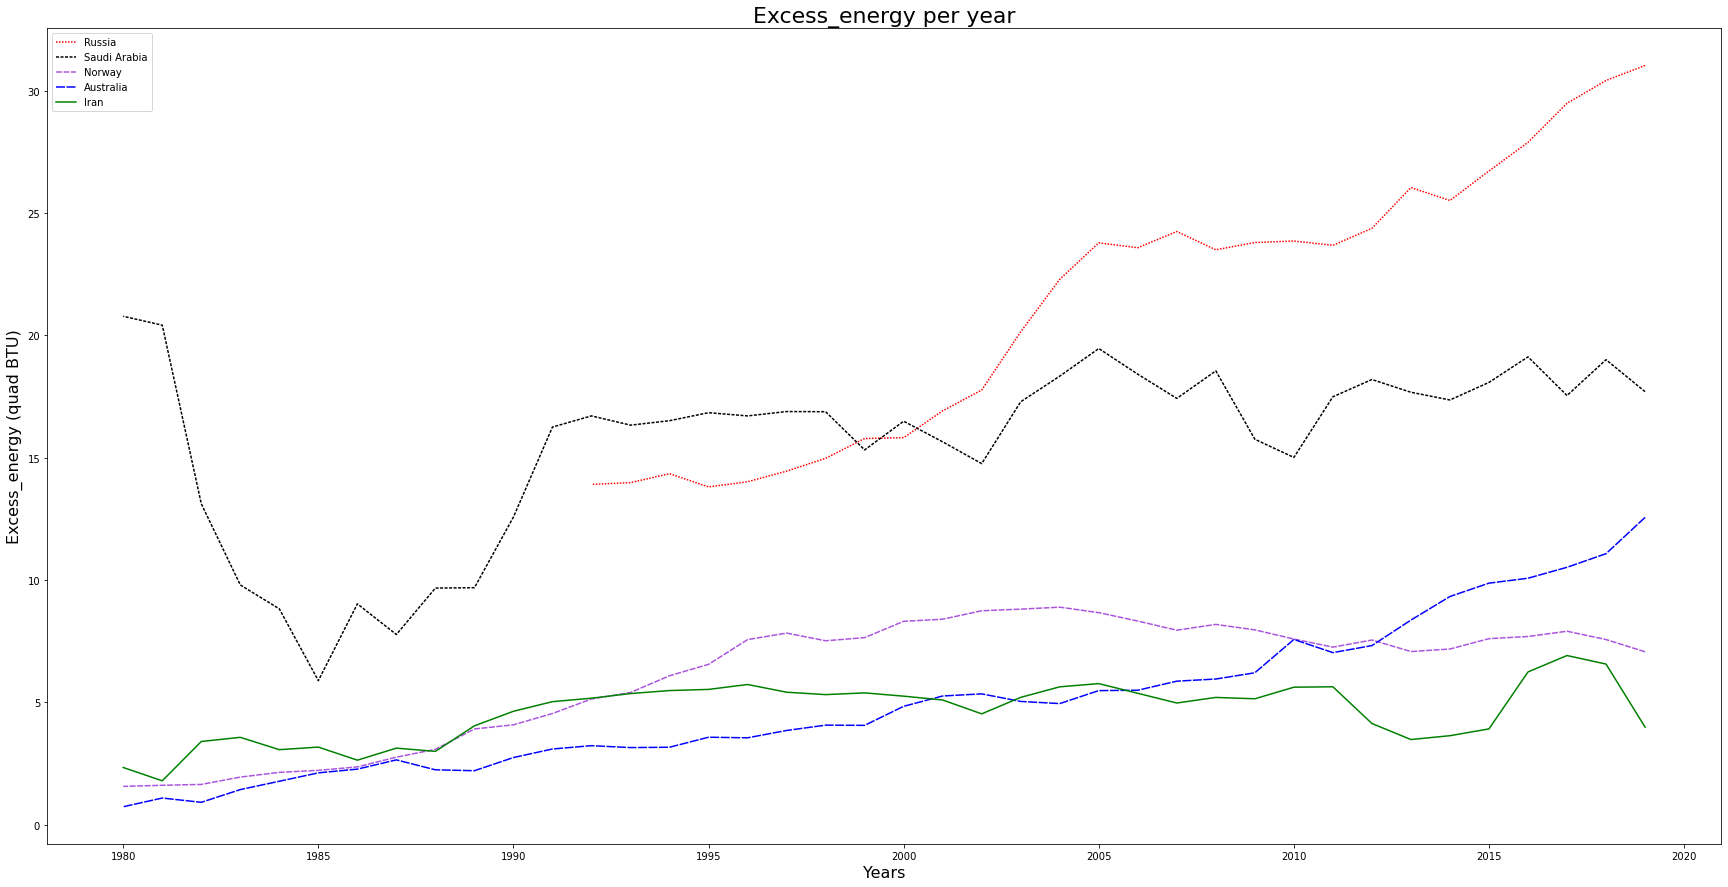

In [27]:
plt.figure(figsize=(30,15))
plt.plot(energy_Russia['Year'], energy_Russia['Excess_energy'], color = 'red', linestyle = (0,(1,1)), label = "Russia")
plt.plot(energy_Saudi['Year'], energy_Saudi['Excess_energy'], color = 'k', linestyle = (0,(2,1)), label = "Saudi Arabia")
plt.plot(energy_Norway['Year'], energy_Norway['Excess_energy'], color = '#aa55dd', linestyle= (0,(4,1)), label = "Norway")
plt.plot(energy_Australia['Year'], energy_Australia['Excess_energy'], color = 'blue', linestyle = (0,(6,1)), label = "Australia")
plt.plot(energy_Iran['Year'], energy_Iran['Excess_energy'], color = 'green',  label = "Iran")
plt.legend()
plt.title("Excess_energy per year", fontsize=22)
plt.ylabel('Excess_energy (quad BTU)', fontsize=16)
plt.xlabel('Years', fontsize=16)
pass

Website can maybe explain saudi arabia dip: https://www.pbs.org/wgbh/pages/frontline/shows/saudi/etc/cron.html#:~:text=In%201985%2C%20Congress%20rejected%20President,forced%20to%20withdraw%20the%20proposal.

USSR splits in 1991 and is the reason why Russia data starts in 1991.

### Plotly Total Excess Energy

In [56]:
#Main Data Set
#energy_cl is created int the wolrds Excess Energy section
excess = energy_cl[energy_cl.Energy_type=='all_energy_types']
excess = excess[excess.Country != 'World']

#join energy table and iso_code table with left join
renew_energy_1 = pd.merge(excess, iso_code, how='left', on = 'Country')

In [57]:
#this is checking what countries that will not be mapped in plotly
check = renew_energy_1.groupby('Country').count()
check[check['Alpha-3 code'] == 0]

Energy_type  Year  Energy_consumption  \
Country                                                               
British Virgin Islands                 40    40                  40   
Cabo Verde                             40    40                  40   
Congo-Brazzaville                      40    40                  40   
Congo-Kinshasa                         40    40                  40   
Côte d’Ivoire                          40    40                  40   
Eswatini                               40    40                  40   
Falkland Islands                       40    40                  40   
Former Czechoslovakia                  40    40                  13   
Former Serbia and Montenegro           40    40                  14   
Former U.S.S.R.                        40    40                  12   
Former Yugoslavia                      40    40                  12   
Gambia, The                            40    40                  40   
Germany, East                          40    40                  11   
Germany, West                          40    40                  11   
Hawaiian Trade Zone                    40    40                   7   
Iran                                   40    40                  40   
Kosovo                                 40    40                  12   
Laos                                   40    40                  40   
Macau                                  40    40                  40   
Micronesia                             40    40                  40   
Moldova                                40    40                  28   
North Korea                            40    40                  40   
North Macedonia                        40    40                  28   
Palestinian Territories                40    40                  23   
Reunion                                40    40                  40   
Saint Helena                           40    40                  40   
Saint Vincent/Grenadines               40    40                  40   
Syria                                  40    40                  40   
Tanzania                               40    40                  40   
The Bahamas                            40    40                  40   
U.S. Pacific Islands                   40    40                  40   
U.S. Territories                       40    40                  40   
U.S. Virgin Islands                    40    40                  40   
Wake Island                            40    40                  40   

                              Energy_production  GDP  Population  \
Country                                                            
British Virgin Islands                       40   32          40   
Cabo Verde                                   40   32          40   
Congo-Brazzaville                            40   32          40   
Congo-Kinshasa                               40   32          40   
Côte d’Ivoire                                40   32          40   
Eswatini                                     40   32          40   
Falkland Islands                             40    0           0   
Former Czechoslovakia                        13    0           0   
Former Serbia and Montenegro                 14    0           0   
Former U.S.S.R.                              12    0           0   
Former Yugoslavia                            12    0           0   
Gambia, The                                  40   32          40   
Germany, East                                11    0           0   
Germany, West                                11    0           0   
Hawaiian Trade Zone                           7    0           0   
Iran                                         40   32          40   
Kosovo                                       12   12          12   
Laos                                         40   32          40   
Macau                                        40   32          40   
Micronesia                                   

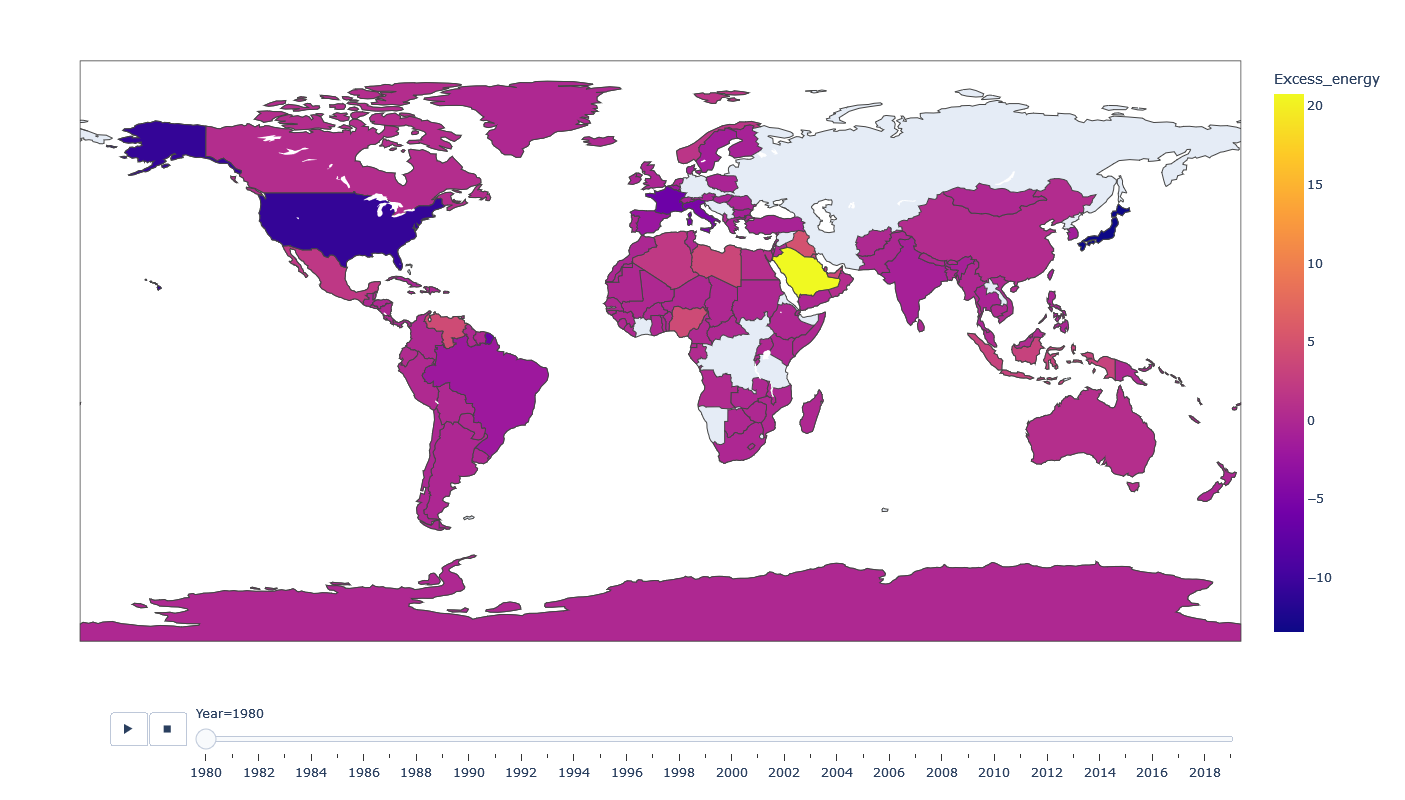

In [58]:
fig = px.choropleth(renew_energy_1,
                    locations ="Alpha-3 code",
                    color ="Excess_energy",
                    hover_name ="Country", 
                    color_continuous_scale = px.colors.sequential.Plasma,
                    scope ="world",
                    animation_frame ="Year",
                    width = 1200,
                    height = 800)
fig.show()

## Renewable Energy Production

2.	What is the world trend on renewable energy production?

### World Clean Energy Trend

In [59]:
#Create Excess Energy 
energy_cl = final_df.copy(deep=True)
energy_cl['Excess_energy'] = final_df['Energy_production'] - final_df['Energy_consumption']

# Creating a new data frame for world renewable energy
energy_renew_world = energy_cl[energy_cl["Energy_type"]=="renewables_n_other"]
energy_renew_world = energy_renew_world[energy_renew_world['Country']=='World']

# Creating a new data frame for nuclear energy
energy_nuc_world = energy_cl[energy_cl["Energy_type"]=="nuclear"]
energy_nuc_world = energy_nuc_world[energy_nuc_world['Country']=='World']

#Creating a data frame of the energy fram combined

energy_renew_combine = []
for i in range(1980,2020):
    x = energy_nuc_world[energy_nuc_world["Year"]== i]['Energy_production'].values[0]
    y = energy_renew_world[energy_renew_world["Year"]== i]['Energy_production'].values[0]
    z = x+y
    energy_renew_combine.append([int(i),float(z)])

nuc_renew_world = pd.DataFrame(energy_renew_combine, columns =["Year", "Energy_production"])

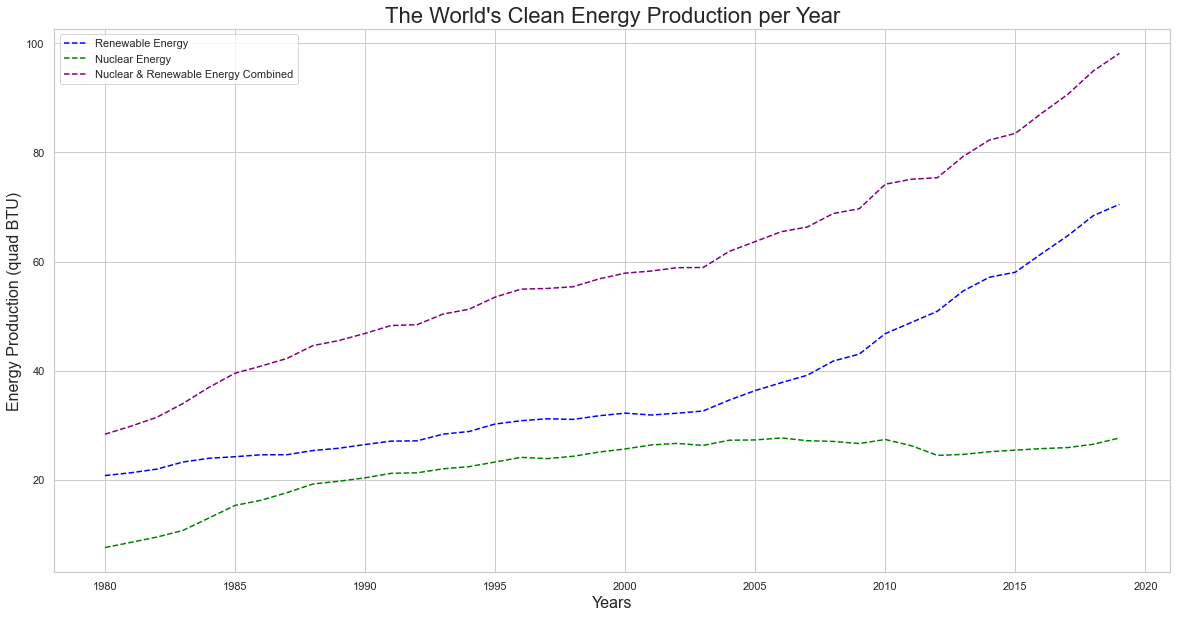

In [60]:
#Plotting the Clean energy. Nuclear is considered clean energy due to no direct green house gas emission.
plt.figure(figsize=(20,10))
plt.plot(energy_renew_world['Year'], energy_renew_world['Energy_production'], color = 'blue', linestyle ='--', label = 'Renewable Energy')
plt.plot(energy_nuc_world['Year'], energy_nuc_world['Energy_production'], color = 'green', linestyle ='--', label = 'Nuclear Energy')
plt.plot(nuc_renew_world['Year'], nuc_renew_world['Energy_production'], color = 'purple', linestyle ='--', label = 'Nuclear & Renewable Energy Combined')
plt.title("The World's Clean Energy Production per Year", fontsize = 22)
plt.ylabel('Energy Production (quad BTU)', fontsize = 16)
plt.xlabel('Years', fontsize = 16)
plt.legend()
pass


In [61]:
print(f"Energy increase for renewable energy is {(energy_renew_world['Energy_production'].max() - energy_renew_world['Energy_production'].min())/energy_renew_world['Energy_production'].min() *100: 0.2f}%")
print(f"Energy increase for nuclear energy is {(energy_nuc_world['Energy_production'].max() - energy_nuc_world['Energy_production'].min())/energy_nuc_world['Energy_production'].min() *100: 0.2f}%")
print(f"Energy increase for clean energy is {(nuc_renew_world['Energy_production'].max() - nuc_renew_world['Energy_production'].min())/nuc_renew_world['Energy_production'].min() *100: 0.2f}%")

Energy increase for renewable energy is  239.21%
Energy increase for nuclear energy is  265.25%
Energy increase for clean energy is  246.14%


Interesting to see that nuclear had a rise in energy production and leveled out during the 2000s and had a decrease but during that time there was a huge increase in renewable energy. It appears that countries were moving away from nuclear to renewable energy. It also shows that the world is increasing clean energy production every year. Suprisingly nuclear energy has had the largest percent increase from 1980 to 2019. The % increase are all relatively similar.

### Checking clean energy countries for 2019

In [62]:
# Checking top 10 countries for renewable energy production
energy_renew = energy_cl[energy_cl.Energy_type=='renewables_n_other']
energy_renew = energy_renew[energy_renew.Country != 'World']
energy_renew = energy_renew[energy_renew.Year == 2019]
energy_renew['Energy_production'] = energy_renew['Energy_production'].fillna(0)
energy_renew.sort_values('Energy_production', ascending = False)[["Country",'Energy_production']].head(10)

Country  Energy_production
1289328          China              18.00
1314066  United States              11.60
1286976         Brazil               5.44
1288428         Canada               3.85
1296984          India               2.85
1294254        Germany               2.37
1298250          Japan               1.99
1307531         Russia               1.76
1312637         Turkey               1.19
1305324         Norway               1.16

In [63]:
# Checking top 10 countries nuclear for energy production
energy_nuc = energy_cl[energy_cl.Energy_type=='nuclear']
energy_nuc = energy_nuc[energy_nuc.Country != 'World']
energy_nuc = energy_nuc[energy_nuc.Year == 2019]
energy_nuc['Energy_production'] = energy_nuc['Energy_production'].fillna(0)
energy_nuc.sort_values('Energy_production', ascending = False)[["Country",'Energy_production']].head(10)

Country  Energy_production
1314036  United States               8.45
1293318         France               3.97
1289298          China               3.38
1307530         Russia               2.11
1309912    South Korea               1.34
1288398         Canada               1.07
1313496        Ukraine               0.85
1294224        Germany               0.71
1298220          Japan               0.66
1310934         Sweden               0.65

In [64]:
# Checking top 10 countries for clean energy production
energy_clean = pd.merge(energy_renew, energy_nuc, on=['Country', 'Year'], how='inner')
energy_clean = energy_clean[['Country', 'Year', 'Energy_production_x', 'Energy_production_y']]
energy_clean.columns = ['Country', 'Year', 'Renew_Energy_Production', 'Nuc_Energy_Production']
energy_clean["Clean_Energy_Production"] = energy_clean['Renew_Energy_Production'] + energy_clean['Nuc_Energy_Production']
energy_clean.sort_values('Clean_Energy_Production', ascending = False).head(10)

Country  Year  Renew_Energy_Production  Nuc_Energy_Production  \
40           China  2019                    18.00                   3.38   
219  United States  2019                    11.60                   8.45   
25          Brazil  2019                     5.44                   0.16   
72          France  2019                     1.14                   3.97   
35          Canada  2019                     3.85                   1.07   
169         Russia  2019                     1.76                   2.11   
98           India  2019                     2.85                   0.49   
78         Germany  2019                     2.37                   0.71   
106          Japan  2019                     1.99                   0.66   
189    South Korea  2019                     0.27                   1.34   

     Clean_Energy_Production  
40                     21.38  
219                    20.05  
25                      5.60  
72                      5.11  
35                      4.92  
169                     3.86  
98                      3.34  
78                      3.08  
106                     2.65  
189                     1.62

### Plotly: Renewable Energy per country (Not including Nuclear)

In [65]:
#Main Data Set
#energy_cl is created int the wolrds Excess Energy section
energy_renew = energy_cl[energy_cl.Energy_type=='renewables_n_other']
energy_renew = energy_renew[energy_renew.Country != 'World']
#Supplemental DataSet
iso_code =pd.read_csv("countries_codes_and_coordinates.csv")
iso_code = iso_code[['Country','Alpha-3 code']]
def replace_string(x):
    lst=[]
    for i in x:
        if i != '"' and i !=" ":
            # print(i)
            lst.append(i)
    return (str("".join(lst)))
iso_code['Alpha-3 code'] = iso_code['Alpha-3 code'].apply(replace_string)

#join energy table and iso_code table with left join
renew_energy_1 = pd.merge(energy_renew, iso_code, how='left', on = 'Country')

In [66]:
#this is checking what countries that will not be mapped in plotly
check = renew_energy_1.groupby('Country').count()
check[check['Alpha-3 code'] == 0]

Energy_type  Year  Energy_consumption  \
Country                                                               
British Virgin Islands                 40    40                  40   
Cabo Verde                             40    40                  40   
Congo-Brazzaville                      40    40                  40   
Congo-Kinshasa                         40    40                  40   
Côte d’Ivoire                          40    40                  40   
Eswatini                               40    40                  40   
Falkland Islands                       40    40                  40   
Former Czechoslovakia                  40    40                  13   
Former Serbia and Montenegro           40    40                  14   
Former U.S.S.R.                        40    40                  12   
Former Yugoslavia                      40    40                  12   
Gambia, The                            40    40                  40   
Germany, East                          40    40                  11   
Germany, West                          40    40                  11   
Hawaiian Trade Zone                    40    40                   7   
Iran                                   40    40                  40   
Kosovo                                 40    40                  12   
Laos                                   40    40                  40   
Macau                                  40    40                  40   
Micronesia                             40    40                  40   
Moldova                                40    40                  28   
North Korea                            40    40                  40   
North Macedonia                        40    40                  28   
Palestinian Territories                40    40                  23   
Reunion                                40    40                  40   
Saint Helena                           40    40                  40   
Saint Vincent/Grenadines               40    40                  40   
Syria                                  40    40                  40   
Tanzania                               40    40                  40   
The Bahamas                            40    40                  40   
U.S. Pacific Islands                   40    40                  40   
U.S. Territories                       40    40                  40   
U.S. Virgin Islands                    40    40                  40   
Wake Island                            40    40                  40   

                              Energy_production  GDP  Population  \
Country                                                            
British Virgin Islands                       40   32          40   
Cabo Verde                                   40   32          40   
Congo-Brazzaville                            40   32          40   
Congo-Kinshasa                               40   32          40   
Côte d’Ivoire                                40   32          40   
Eswatini                                     40   32          40   
Falkland Islands                             40    0           0   
Former Czechoslovakia                        13    0           0   
Former Serbia and Montenegro                 14    0           0   
Former U.S.S.R.                              12    0           0   
Former Yugoslavia                            12    0           0   
Gambia, The                                  40   32          40   
Germany, East                                11    0           0   
Germany, West                                11    0           0   
Hawaiian Trade Zone                           7    0           0   
Iran                                         40   32          40   
Kosovo                                       12   12          12   
Laos                                         40   32          40   
Macau                                        40   32          40   
Micronesia                                   

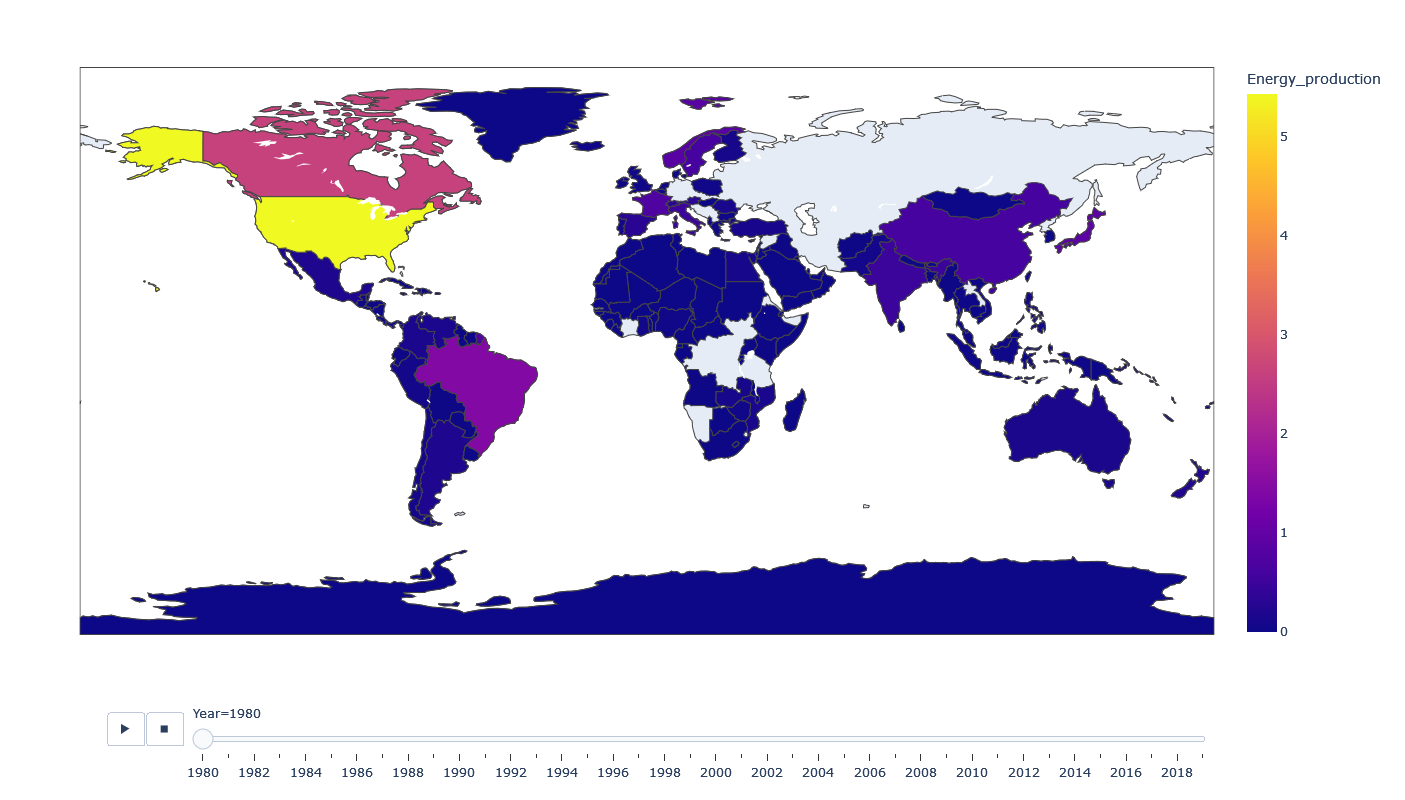

In [67]:
fig = px.choropleth(renew_energy_1,
                    locations ="Alpha-3 code",
                    color ="Energy_production",
                    hover_name ="Country", 
                    color_continuous_scale = px.colors.sequential.Plasma,
                    scope ="world",
                    animation_frame ="Year",
                    width = 1200,
                    height = 800)
fig.show()

### Plotly: Clean Energy per country (Nuclear and Renewable Energy)

In [68]:
# renewable energy production
#energy_cl is created int the wolrds Excess Energy section
energy_renew = energy_cl[energy_cl.Energy_type=='renewables_n_other']
energy_renew = energy_renew[energy_renew.Country != 'World']
energy_renew['Energy_production'] = energy_renew['Energy_production'].fillna(0)

# nuclear for energy production
energy_nuc = energy_cl[energy_cl.Energy_type=='nuclear']
energy_nuc = energy_nuc[energy_nuc.Country != 'World']
energy_nuc['Energy_production'] = energy_nuc['Energy_production'].fillna(0)

# clean energy production
energy_clean = pd.merge(energy_renew, energy_nuc, on=['Country', 'Year'], how='inner')
energy_clean = energy_clean[['Country', 'Year', 'Energy_production_x', 'Energy_production_y']]
energy_clean.columns = ['Country', 'Year', 'Renew_Energy_Production', 'Nuc_Energy_Production']
energy_clean["Clean_Energy_Production"] = energy_clean['Renew_Energy_Production'] + energy_clean['Nuc_Energy_Production']


#Pull alpha-3 code from supp data set
iso_code =pd.read_csv("countries_codes_and_coordinates.csv")
iso_code = iso_code[['Country','Alpha-3 code']]
def replace_string(x):
    lst=[]
    for i in x:
        if i != '"' and i !=" ":
            # print(i)
            lst.append(i)
    return (str("".join(lst)))
iso_code['Alpha-3 code'] = iso_code['Alpha-3 code'].apply(replace_string)

#join energy table and iso_code table with left join
energy_clean_1 = pd.merge(energy_clean, iso_code, how='left', on = 'Country')

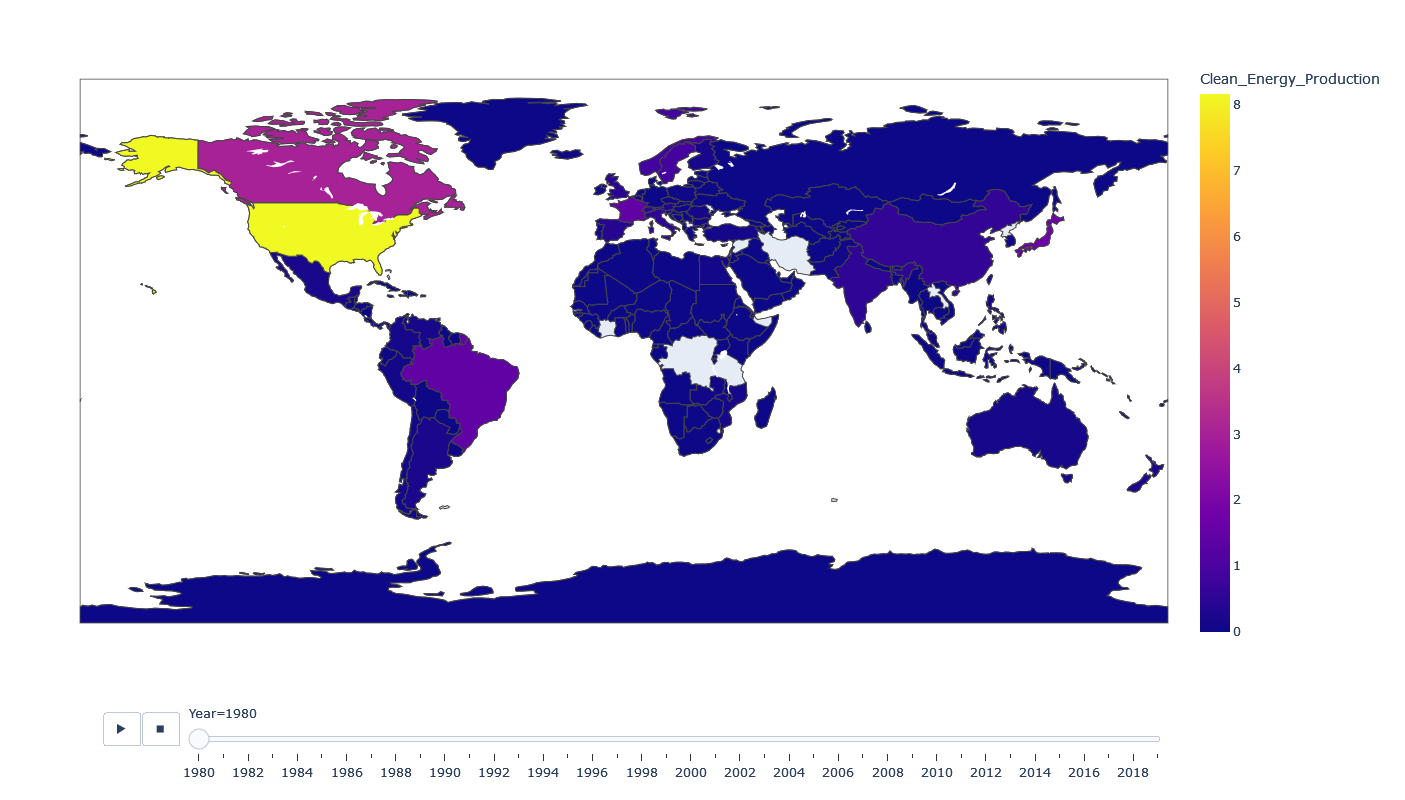

In [69]:
fig = px.choropleth(energy_clean_1,
                    locations ="Alpha-3 code",
                    color ="Clean_Energy_Production",
                    hover_name ="Country", 
                    color_continuous_scale = px.colors.sequential.Plasma,
                    scope ="world",
                    animation_frame ="Year",
                    width = 1200,
                    height = 800)
fig.show()

## Question 5: Which country had the greatest decrease in CO2 emissions from their peak?

In [70]:
#Find the peak for each country and then the low AFTER that peak. We don't care of the lows before their peak
dict_peak = {"Country":[],"Year":[],"decrease":[],"percent_decrease":[]};

for country in final_df.Country.unique():
    peak = final_df['CO2_emission'].loc[(final_df['Country'] == country) & (final_df['Energy_type'] == 'all_energy_types')].max()
    year = final_df['Year'].loc[final_df['CO2_emission'] == peak].max()
    low = final_df['CO2_emission'].loc[(final_df['Country'] == country) & (final_df['Year'] > year) & (final_df['Energy_type'] == 'all_energy_types')].min()
    decrease = peak - low
    #Divide by zero might occur, so turn into 1
    if peak == 0:
        peak = 1
    
    percent_decrease = decrease/peak
    
    dict_peak["Country"].append(country)
    dict_peak["Year"].append(year)
    dict_peak["decrease"].append(decrease)
    dict_peak["percent_decrease"].append(percent_decrease)
    
df_peak = pd.DataFrame(dict_peak)
#What are the top 10 countries that had the greatest percentage decrease in their CO2 levels
df_peak_percent = df_peak.sort_values(by=['percent_decrease'], ascending = False).head(10)
df_peak_percent

Country  Year  decrease  percent_decrease
6                   Antarctica  2011      0.29              0.95
215        U.S. Virgin Islands  2005     11.88              0.90
88                        Guam  1982      4.26              0.87
119                    Liberia  1981      1.59              0.84
152                North Korea  1985     82.40              0.81
2                      Albania  1987      8.20              0.81
78                     Georgia  1993     11.18              0.75
142                      Nauru  2011      0.14              0.71
175  Saint Pierre and Miquelon  2011      0.21              0.70
200                 Tajikistan  2007      5.14              0.68

This doesn't really tell us much. The amount that was decreased is very little. It would be better to find out who had the greatest decrease overall and then sort those by percent decrease. 

In [71]:
#get the top 10 countries with the greatest decreases in CO2 
df_peak = df_peak.sort_values(by=['decrease'], ascending = False).head(10)
#now sort that list by the greatest percent decrease. 
df_peak = df_peak.sort_values(by=['percent_decrease'], ascending = False)
df_peak

Country  Year  decrease  percent_decrease
217         Ukraine  1993    396.48              0.67
109      Kazakhstan  1993    203.66              0.57
164          Poland  1988    169.97              0.36
219  United Kingdom  1992    202.52              0.33
170          Russia  1993    701.40              0.32
105           Italy  2004    136.07              0.29
79          Germany  1992    211.63              0.21
220   United States  2008    884.46              0.15
107           Japan  2013    160.18              0.12
41            China  2014    470.41              0.04

## Ukraine had the biggest drop in CO2 levels from it's peak.
Ukraine had the biggest percentage drop in it's CO2 levels compared to the other top 10 CO2 producing countries. 

### What did Ukraine do to achieve this improvement?
Will need to plot the country's energy type and production 


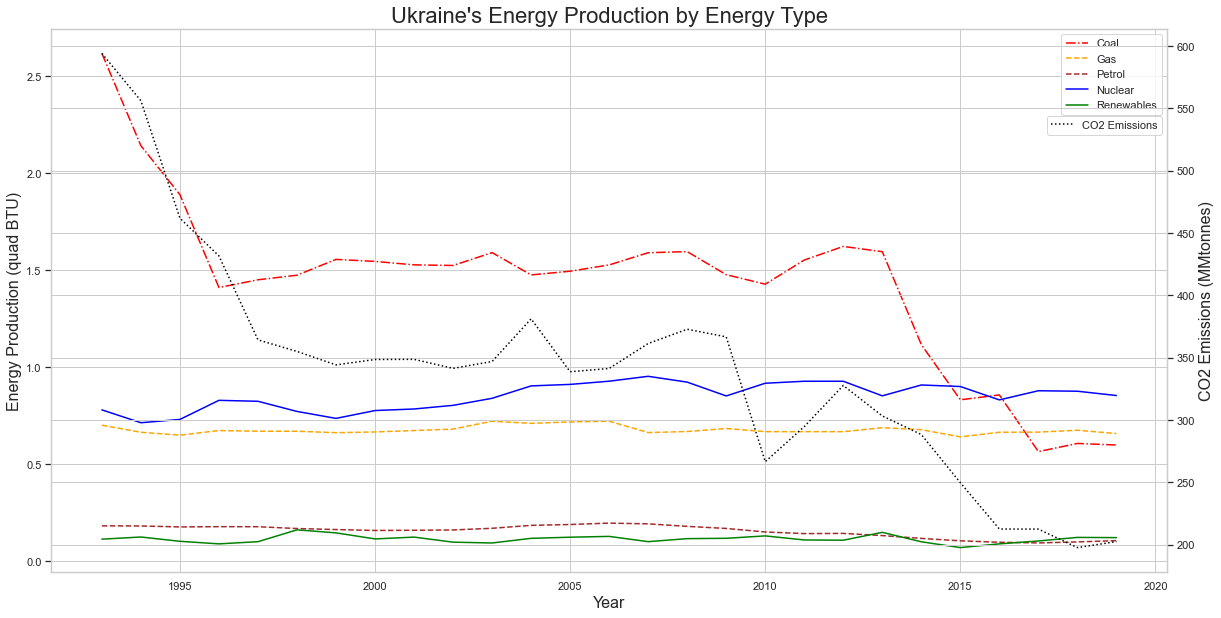

In [72]:
fig = plt.figure(figsize=(20,10))
#create datafoundation with only the data needed to plot chart
plot_df = final_df[['Energy_type', 'Year', 'Energy_production']].loc[(final_df['Country'] == 'Ukraine') & (final_df['Year'] > 1992)]
plot_df_co2 = final_df[['Energy_type','Year', 'CO2_emission']].loc[(final_df['Country'] == 'Ukraine') & (final_df['Year'] > 1992)]
#create second axis to show co2 levels 
ax = fig.add_subplot(111)
ax2 = ax.twinx()

plot_coal = plot_df.loc[plot_df['Energy_type'] == 'coal']
plot_gas = plot_df.loc[plot_df['Energy_type'] == 'natural_gas']
plot_petrol = plot_df.loc[plot_df['Energy_type'] == 'petroleum_n_other_liquids']
plot_nuke = plot_df.loc[plot_df['Energy_type'] == 'nuclear']
plot_renew = plot_df.loc[plot_df['Energy_type'] == 'renewables_n_other']
plot_co2 = plot_df_co2.loc[plot_df_co2['Energy_type'] == 'all_energy_types']

ax.plot(plot_coal['Year'],plot_coal['Energy_production'], color = 'red', linestyle ='-.', label = 'Coal')
ax.plot(plot_gas['Year'],plot_gas['Energy_production'], color = 'orange', linestyle ='--', label = 'Gas')
ax.plot(plot_petrol['Year'],plot_petrol['Energy_production'], color = 'brown', linestyle ='--', label = 'Petrol')
ax.plot(plot_nuke['Year'],plot_nuke['Energy_production'], color = 'blue', linestyle ='-', label = 'Nuclear')
ax.plot(plot_renew['Year'],plot_renew['Energy_production'], color = 'green', linestyle ='-', label = 'Renewables')

ax.set_ylabel('Energy Production (quad BTU)', fontsize = 16)
ax2.plot(plot_co2['Year'],plot_co2['CO2_emission'], color = 'black', linestyle = ':', label = 'CO2 Emissions')
ax2.set_ylabel('CO2 Emissions (MMtonnes)', fontsize = 16)

plt.title("Ukraine's Energy Production by Energy Type", fontsize = 22)
ax.set_xlabel("Year", fontsize=16)
ax.legend()
ax2.legend(loc='upper right', bbox_to_anchor=(1,.85))
plt.show()

### It looks like Ukraine reduced CO2 levels by reducing the amount of coal production. It's interesting that they didn't increase production in any other forms of energy to compensate for the reduced energy. 

### Could something else be going on?

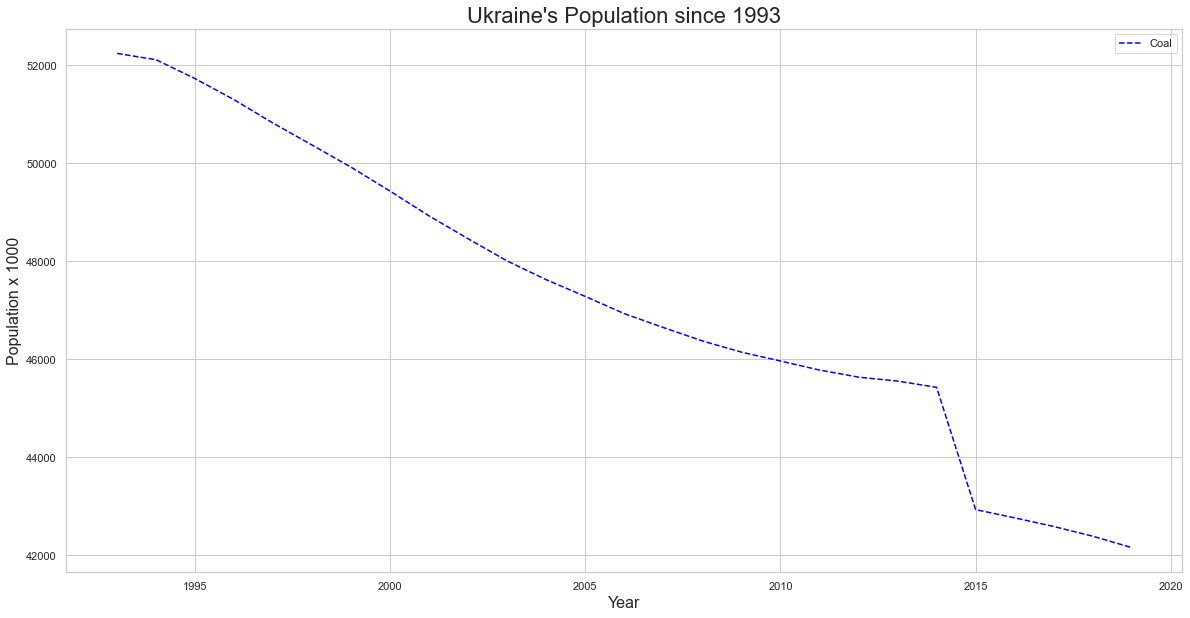

In [73]:
#maybe the population has changed? 
plt.figure(figsize=(20,10))
plot_df = final_df[['Year', 'Population']].loc[(final_df['Country'] == 'Ukraine') & (final_df['Year'] > 1992)]

plt.plot(plot_df['Year'],plot_df['Population'], color = 'blue', linestyle ='--', label = 'Coal')

plt.title("Ukraine's Population since 1993", fontsize = 22)
plt.ylabel('Population x 1000', fontsize = 16)
plt.xlabel('Year', fontsize = 16)
plt.legend()
plt.show()


### We found out in question 1 that Japan had a decline in population but no decrease in CO2 levels. This might be due to the fact that the population has only recently started to decline and the total decline since it's peak is less than 2%. Ukraine, on the other hand, has lost 20% of their population since 1993, when they had peak CO2 levels. This severe drop in population did have an effect on CO2 levels but only because of this drastic decline in population. 